# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset

In [6]:
df = pd.read_csv('Africa_GDP.csv')
df

Year       Algeria         Benin      Botswana  Burkina Faso  \
0   1960  2.723615e+09  2.261956e+08  3.041141e+07  3.304428e+08   
1   1961  2.434747e+09  2.356682e+08  3.290261e+07  3.502472e+08   
2   1962  2.001445e+09  2.364350e+08  3.564496e+07  3.795671e+08   
3   1963  2.702982e+09  2.539277e+08  3.809184e+07  3.940407e+08   
4   1964  2.909316e+09  2.698190e+08  4.161635e+07  4.103216e+08   
..   ...           ...           ...           ...           ...   
59  2019  1.934600e+11  1.439071e+10  1.672591e+10  1.603281e+10   
60  2020  1.648730e+11  1.568674e+10  1.496029e+10  1.772501e+10   
61  2021  1.862650e+11  1.768762e+10  1.875095e+10  1.964317e+10   
62  2022  2.255600e+11  1.742542e+10  2.032196e+10  1.882022e+10   
63  2023  2.398990e+11  1.967328e+10  1.939577e+10  2.032462e+10   

         Burundi      Cameroon  Central African Republic          Chad  \
0   1.960000e+08  6.142061e+08              1.121556e+08  3.135827e+08   
1   2.030000e+08  6.527776e+08              1.231346e+08  3.339753e+08   
2   2.135000e+08  6.942479e+08              1.244828e+08  3.576357e+08   
3   2.327500e+08  7.183208e+08              1.293791e+08  3.717670e+08   
4   2.607500e+08  7.766502e+08              1.420251e+08  3.922475e+08   
..           ...           ...                       ...           ...   
59  2.576519e+09  3.966776e+10              2.221301e+09  1.131495e+10   
60  2.649680e+09  4.077324e+10              2.326721e+09  1.071540e+10   
61  2.775799e+09  4.499352e+10              2.516498e+09  1.177998e+10   
62  3.338723e+09  4.364407e+10              2.382619e+09  1.239681e+10   
63  2.642162e+09  4.794551e+10              2.555492e+09  1.314933e+10   

        Eswatini  ...    Seychelles  Sierra Leone       Somalia  South Africa  \
0   3.507685e+07  ...  1.201202e+07  3.221515e+08  1.804599e+08  8.748597e+09   
1   4.302604e+07  ...  1.159202e+07  3.279792e+08  1.916599e+08  9.225996e+09   
2   4.592796e+07  ...  1.264203e+07  3.428727e+08  2.035319e+08  9.813996e+09   
3   5.412944e+07  ...  1.392303e+07  3.487007e+08  2.161459e+08  1.085420e+10   
4   6.498055e+07  ...  1.539303e+07  3.720121e+08  2.295299e+08  1.195600e+10   
..           ...  ...           ...           ...           ...           ...   
59  4.495267e+09  ...  1.868690e+09  4.076579e+09  9.420431e+09  3.893300e+11   
60  3.982237e+09  ...  1.382552e+09  4.062906e+09  9.204140e+09  3.382910e+11   
61  4.850843e+09  ...  1.487174e+09  4.249235e+09  9.838712e+09  4.201180e+11   
62  4.790923e+09  ...  2.057969e+09  4.094564e+09  1.041954e+10  4.052710e+11   
63  4.597856e+09  ...  2.141450e+09  3.809832e+09  1.167980e+10  3.777820e+11   

           Sudan      Tanzania          Togo        Uganda        Zambia  \
0   1.127011e+09  2.651730e+09  1.710571e+08  4.230084e+08  7.130000e+08   
1   1.223563e+09  2.826179e+09  1.784971e+08  4.415241e+08  6.962857e+08   
2   1.329023e+09  3.101590e+09  1.867458e+08  4.490126e+08  6.931429e+08   
3   1.352011e+09  3.456579e+09  2.023059e+08  5.161478e+08  7.187143e+08   
4   1.389080e+09  3.748841e+09  2.345722e+08  5.890566e+08  8.394286e+08   
..           ...           ...           ...           ...           ...   
59  3.233808e+10  6.102673e+10  6.992700e+09  3.534816e+10  2.330867e+10   
60  2.703459e+10  6.606874e+10  7.400284e+09  3.760037e+10  1.813776e+10   
61  3.422951e+10  7.065563e+10  8.342244e+09  4.052979e+10  2.209642e+10   
62  5.166688e+10  7.576997e+10  8.169476e+09  4.556533e+10  2.916378e+10   
63  1.093270e+11  7.915829e+10  9.171262e+09  4.927288e+10  2.816263e+10   

        Zimbabwe  
0   1.052990e+09  
1   1.096647e+09  
2   1.117602e+09  
3   1.159512e+09  
4   1.217138e+09  
..           ...  
59  2.183223e+10  
60  2.150970e+10  
61  2.837124e+10  
62  2.736663e+10  
63  2.653827e+10  

[64 rows x 34 columns]

### Exploratory Data Analysis

In [65]:
df.shape

(64, 34)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      64 non-null     int64  
 1   Algeria                   64 non-null     float64
 2   Benin                     64 non-null     float64
 3   Botswana                  64 non-null     float64
 4   Burkina Faso              64 non-null     float64
 5   Burundi                   64 non-null     float64
 6   Cameroon                  64 non-null     float64
 7   Central African Republic  64 non-null     float64
 8   Chad                      64 non-null     float64
 9   Eswatini                  64 non-null     float64
 10  Ethiopia                  64 non-null     float64
 11  Gabon                     64 non-null     float64
 12  Ghana                     64 non-null     float64
 13  Kenya                     64 non-null     float64
 14  Lesotho     

In [69]:
df.describe().T

count          mean           std           min  \
Year                       64.0  1.991500e+03  1.861899e+01  1.960000e+03   
Algeria                    64.0  7.971055e+10  7.622340e+10  2.001445e+09   
Benin                      64.0  4.706354e+09  5.452323e+09  2.261956e+08   
Botswana                   64.0  5.823204e+09  6.239429e+09  3.041141e+07   
Burkina Faso               64.0  5.154302e+09  5.770365e+09  3.304428e+08   
Burundi                    64.0  1.170612e+09  8.781623e+08  1.589950e+08   
Cameroon                   64.0  1.484101e+10  1.370806e+10  6.142061e+08   
Central African Republic   64.0  1.097358e+09  7.527577e+08  1.121556e+08   
Chad                       64.0  4.011726e+09  4.635655e+09  3.135827e+08   
Eswatini                   64.0  1.756771e+09  1.726276e+09  3.507685e+07   
Ethiopia                   64.0  2.380645e+10  3.505895e+10  1.610512e+09   
Gabon                      64.0  6.811618e+09  6.387046e+09  1.414690e+08   
Ghana                      64.0  1.773524e+10  2.383866e+10  1.223944e+09   
Kenya                      64.0  2.450099e+10  3.278041e+10  7.912655e+08   
Lesotho                    64.0  9.536186e+08  8.766991e+08  3.457999e+07   
Liberia                    64.0  1.181470e+09  1.182827e+09  1.322000e+08   
Libya                      64.0  3.333031e+10  2.372149e+10  4.016442e+08   
Madagascar                 64.0  5.610781e+09  4.470441e+09  6.730817e+08   
Mauritius                  64.0  4.751985e+09  4.812203e+09  1.620896e+08   
Morocco                    64.0  4.789525e+10  4.540146e+10  2.025694e+09   
Niger                      64.0  4.278746e+09  4.422537e+09  4.495269e+08   
Nigeria                    64.0  1.603007e+11  1.707061e+11  4.196175e+09   
Rwanda                     64.0  3.216822e+09  3.641582e+09  1.190000e+08   
Senegal                    64.0  8.817916e+09  7.998927e+09  1.003692e+09   
Seychelles                 64.0  5.927619e+08  5.980318e+08  1.159202e+07   
Sierra Leone               64.0  1.549708e+09  1.395453e+09  3.221515e+08   
Somalia                    64.0  2.738637e+09  3.072656e+09  1.804599e+08   
South Africa               64.0  1.695597e+11  1.443651e+11  8.748597e+09   
Sudan                      64.0  2.119729e+10  2.168532e+10  1.127011e+09   
Tanzania                   64.0  1.947700e+10  2.054645e+10  2.651730e+09   
Togo                       64.0  2.674590e+09  2.424903e+09  1.710571e+08   
Uganda                     64.0  1.082091e+10  1.335146e+10  4.230084e+08   
Zambia                     64.0  8.339744e+09  9.211725e+09  6.931429e+08   
Zimbabwe                   64.0  8.722444e+09  7.631959e+09  1.052990e+09   

                                   25%           50%           75%  \
Year                      1.975750e+03  1.991500e+03  2.007250e+03   
Algeria                   1.718566e+10  4.937348e+10  1.444415e+11   
Benin                     6.930237e+08  1.827640e+09  8.510623e+09   
Botswana                  3.678110e+08  4.044671e+09  1.023066e+10   
Burkina Faso              9.674036e+08  2.601069e+09  8.081966e+09   
Burundi                   4.415562e+08  9.709715e+08  1.420109e+09   
Cameroon                  2.887827e+09  1.105305e+10  2.482306e+10   
Central African Republic  4.330294e+08  9.977728e+08  1.692615e+09   
Chad                      8.338813e+08  1.454586e+09  8.810285e+09   
Eswatini                  2.843624e+08  1.220448e+09  3.337909e+09   
Ethiopia                  4.852157e+09  8.692453e+09  2.154744e+10   
Gabon                     2.331508e+09  4.431031e+09  1.219913e+10   
Ghana                     2.987180e+09  5.591031e+09  2.513268e+10   
Kenya                     3.420743e+09  8.246118e+09  3.294243e+10   
Lesotho                   1.505282e+08  7.400513e+08  1.747397e+09   
Liberia                   3.190652e+08  8.187214e+08  1.461250e+09   
Libya                     1.810084e+10  3.059824e+10  4.830632e+10   
Madagascar                2.257748e+09  4.270435e+09  8.797686e+09   


In [73]:
df.head()

Year       Algeria        Benin     Botswana  Burkina Faso      Burundi  \
0  1960  2.723615e+09  226195578.4  30411413.66   330442815.8  195999990.0   
1  1961  2.434747e+09  235668220.5  32902612.87   350247234.3  202999992.0   
2  1962  2.001445e+09  236434954.0  35644956.64   379567099.2  213500006.0   
3  1963  2.702982e+09  253927697.3  38091842.85   394040667.1  232749998.0   
4  1964  2.909316e+09  269819005.9  41616347.79   410321645.0  260750008.0   

      Cameroon  Central African Republic         Chad     Eswatini  ...  \
0  614206068.5               112155598.5  313582728.1  35076845.97  ...   
1  652777608.3               123134583.5  333975336.1  43026042.79  ...   
2  694247864.4               124482773.8  357635713.4  45927961.63  ...   
3  718320845.0               129379123.8  371767002.2  54129438.35  ...   
4  776650176.9               142025078.7  392247517.7  64980554.01  ...   

    Seychelles  Sierra Leone      Somalia  South Africa         Sudan  \
0  12012024.62   322151470.6  180459936.8  8.748597e+09  1.127011e+09   
1  11592023.76   327979248.4  191659914.4  9.225996e+09  1.223563e+09   
2  12642025.92   342872712.4  203531927.5  9.813996e+09  1.329023e+09   
3  13923028.54   348700653.6  216145935.9  1.085420e+10  1.352011e+09   
4  15393031.56   372012091.5  229529912.7  1.195600e+10  1.389080e+09   

       Tanzania         Togo       Uganda       Zambia      Zimbabwe  
0  2.651730e+09  171057069.1  423008385.7  713000000.0  1.052990e+09  
1  2.826179e+09  178497098.3  441524109.0  696285714.3  1.096647e+09  
2  3.101590e+09  186745757.9  449012578.6  693142857.1  1.117602e+09  
3  3.456579e+09  202305865.2  516147798.7  718714285.7  1.159512e+09  
4  3.748841e+09  234572186.5  589056603.8  839428571.4  1.217138e+09  

[5 rows x 34 columns]

In [75]:
df['Year'] = pd.to_datetime(df['Year'].astype(int), format='%Y', errors='coerce')
df.head()

Year       Algeria        Benin     Botswana  Burkina Faso  \
0 1960-01-01  2.723615e+09  226195578.4  30411413.66   330442815.8   
1 1961-01-01  2.434747e+09  235668220.5  32902612.87   350247234.3   
2 1962-01-01  2.001445e+09  236434954.0  35644956.64   379567099.2   
3 1963-01-01  2.702982e+09  253927697.3  38091842.85   394040667.1   
4 1964-01-01  2.909316e+09  269819005.9  41616347.79   410321645.0   

       Burundi     Cameroon  Central African Republic         Chad  \
0  195999990.0  614206068.5               112155598.5  313582728.1   
1  202999992.0  652777608.3               123134583.5  333975336.1   
2  213500006.0  694247864.4               124482773.8  357635713.4   
3  232749998.0  718320845.0               129379123.8  371767002.2   
4  260750008.0  776650176.9               142025078.7  392247517.7   

      Eswatini  ...   Seychelles  Sierra Leone      Somalia  South Africa  \
0  35076845.97  ...  12012024.62   322151470.6  180459936.8  8.748597e+09   
1  43026042.79  ...  11592023.76   327979248.4  191659914.4  9.225996e+09   
2  45927961.63  ...  12642025.92   342872712.4  203531927.5  9.813996e+09   
3  54129438.35  ...  13923028.54   348700653.6  216145935.9  1.085420e+10   
4  64980554.01  ...  15393031.56   372012091.5  229529912.7  1.195600e+10   

          Sudan      Tanzania         Togo       Uganda       Zambia  \
0  1.127011e+09  2.651730e+09  171057069.1  423008385.7  713000000.0   
1  1.223563e+09  2.826179e+09  178497098.3  441524109.0  696285714.3   
2  1.329023e+09  3.101590e+09  186745757.9  449012578.6  693142857.1   
3  1.352011e+09  3.456579e+09  202305865.2  516147798.7  718714285.7   
4  1.389080e+09  3.748841e+09  234572186.5  589056603.8  839428571.4   

       Zimbabwe  
0  1.052990e+09  
1  1.096647e+09  
2  1.117602e+09  
3  1.159512e+09  
4  1.217138e+09  

[5 rows x 34 columns]

In [81]:
def outlier_check(row, colname):
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier

outliers = pd.DataFrame()

for col in df.select_dtypes(include=['number']).columns:
    outliers_in_col = outlier_check(df, col)
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

Year       Algeria         Benin      Botswana  Burkina Faso  \
0  2021-01-01  1.862650e+11  1.768762e+10  1.875095e+10  1.964317e+10   
1  2022-01-01  2.255600e+11  1.742542e+10  2.032196e+10  1.882022e+10   
2  2023-01-01  2.398990e+11  1.967328e+10  1.939577e+10  2.032462e+10   
3  2015-01-01  1.874940e+11  1.138816e+10  1.353075e+10  1.183216e+10   
4  2022-01-01  2.255600e+11  1.742542e+10  2.032196e+10  1.882022e+10   
..        ...           ...           ...           ...           ...   
87 2019-01-01  1.934600e+11  1.439071e+10  1.672591e+10  1.603281e+10   
88 2020-01-01  1.648730e+11  1.568674e+10  1.496029e+10  1.772501e+10   
89 2021-01-01  1.862650e+11  1.768762e+10  1.875095e+10  1.964317e+10   
90 2022-01-01  2.255600e+11  1.742542e+10  2.032196e+10  1.882022e+10   
91 2023-01-01  2.398990e+11  1.967328e+10  1.939577e+10  2.032462e+10   

         Burundi      Cameroon  Central African Republic          Chad  \
0   2.775799e+09  4.499352e+10              2.516498e+09  1.177998e+10   
1   3.338723e+09  4.364407e+10              2.382619e+09  1.239681e+10   
2   2.642162e+09  4.794551e+10              2.555492e+09  1.314933e+10   
3   3.104004e+09  3.221023e+10              1.695826e+09  1.095039e+10   
4   3.338723e+09  4.364407e+10              2.382619e+09  1.239681e+10   
..           ...           ...                       ...           ...   
87  2.576519e+09  3.966776e+10              2.221301e+09  1.131495e+10   
88  2.649680e+09  4.077324e+10              2.326721e+09  1.071540e+10   
89  2.775799e+09  4.499352e+10              2.516498e+09  1.177998e+10   
90  3.338723e+09  4.364407e+10              2.382619e+09  1.239681e+10   
91  2.642162e+09  4.794551e+10              2.555492e+09  1.314933e+10   

        Eswatini  ...    Seychelles  Sierra Leone       Somalia  South Africa  \
0   4.850843e+09  ...  1.487174e+09  4.249235e+09  9.838712e+09  4.201180e+11   
1   4.790923e+09  ...  2.057969e+09  4.094564e+09  1.041954e+10  4.052710e+11   
2   4.597856e+09  ...  2.141450e+09  3.809832e+09  1.167980e+10  3.777820e+11   
3   4.063246e+09  ...  1.432403e+09  4.252029e+09  6.984947e+09  3.467100e+11   
4   4.790923e+09  ...  2.057969e+09  4.094564e+09  1.041954e+10  4.052710e+11   
..           ...  ...           ...           ...           ...           ...   
87  4.495267e+09  ...  1.868690e+09  4.076579e+09  9.420431e+09  3.893300e+11   
88  3.982237e+09  ...  1.382552e+09  4.062906e+09  9.204140e+09  3.382910e+11   
89  4.850843e+09  ...  1.487174e+09  4.249235e+09  9.838712e+09  4.201180e+11   
90  4.790923e+09  ...  2.057969e+09  4.094564e+09  1.041954e+10  4.052710e+11   
91  4.597856e+09  ...  2.141450e+09  3.809832e+09  1.167980e+10  3.777820e+11   

           Sudan      Tanzania          Togo        Uganda        Zambia  \
0   3.422951e+10  7.065563e+10  8.342244e+09  4.052979e+10  2.209642e+10   
1   5.166688e+10  7.576997e+10  8.169476e+09  4.556533e+10  2.916378e+10   
2   1.093270e+11  7.915829e+10  9.171262e+09  4.927288e+10  2.816263e+10   
3   5.172676e+10  4.741392e+10  5.755461e+09  3.238718e+10  2.125122e+10   
4   5.166688e+10  7.576997e+10  8.169476e+09  4.556533e+10  2.916378e+10   
..           ...           ...           ...           ...           ...   
87  3.233808e+10  6.102673e+10  6.992700e+09  3.534816e+10  2.330867e+10   
88  2.703459e+10  6.606874e+10  7.400284e+09  3.760037e+10  1.813776e+10   
89  3.422951e+10  7.065563e+10  8.342244e+09  4.052979e+10  2.209642e+10   
90  5.166688e+10  7.576997e+10  8.169476e+09  4.556533e+10  2.916378e+10   
91  1.093270e+11  7.915829e+10  9.171262e+09  4.927288e+10  2.816263e+10   

        Zimbabwe  
0   2.837124e+10  
1   2.736663e+10  
2   2.653827e+10  
3   1.996312e+10  
4   2.736663e+10  
..           ...  
87  2.183223e+10  
88  2.150970e+10  
89  2.837124e+10  
90  2.736663e+10  
91  2.653827e+10  

[92 rows x 34 columns]

In [83]:
print('Missing Value (%)')
missing_values = df.isna().mean()
print(missing_values)

Missing Value (%)
Year                        0.0
Algeria                     0.0
Benin                       0.0
Botswana                    0.0
Burkina Faso                0.0
Burundi                     0.0
Cameroon                    0.0
Central African Republic    0.0
Chad                        0.0
Eswatini                    0.0
Ethiopia                    0.0
Gabon                       0.0
Ghana                       0.0
Kenya                       0.0
Lesotho                     0.0
Liberia                     0.0
Libya                       0.0
Madagascar                  0.0
Mauritius                   0.0
Morocco                     0.0
Niger                       0.0
Nigeria                     0.0
Rwanda                      0.0
Senegal                     0.0
Seychelles                  0.0
Sierra Leone                0.0
Somalia                     0.0
South Africa                0.0
Sudan                       0.0
Tanzania                    0.0
Togo                  

In [85]:
print('\nDuplicate Rows (%): ')
duplicate_count = df.duplicated().mean()
print(duplicate_count)


Duplicate Rows (%): 
0.0


#### Top 5 countries by highest average GDP

In [155]:
top_countries = df.set_index('Year').mean().sort_values(ascending=False).head(5)
print("Top 5 Countries by Average GDP:")
print(top_countries)

Top 5 Countries by Average GDP:
South Africa    1.695597e+11
Nigeria         1.603007e+11
Algeria         7.971055e+10
Morocco         4.789525e+10
Libya           3.333031e+10
dtype: float64


### Visualizations

#### Country Data Over Years

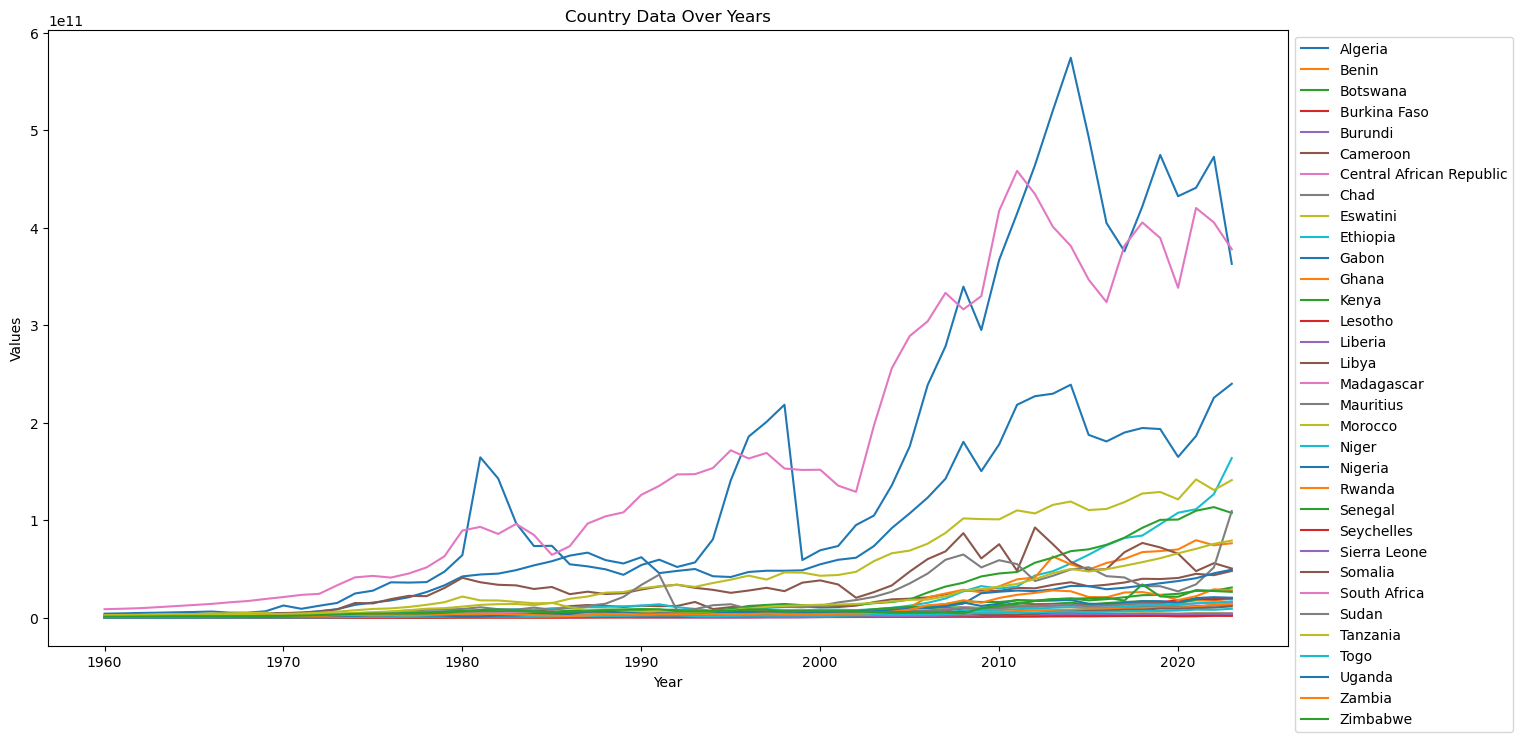

In [100]:
plt.figure(figsize=(16, 8))
for country in df.columns[1: ]:
    plt.plot(df['Year'], df[country], label=country)

plt.title('Country Data Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Distribution of Data by Country

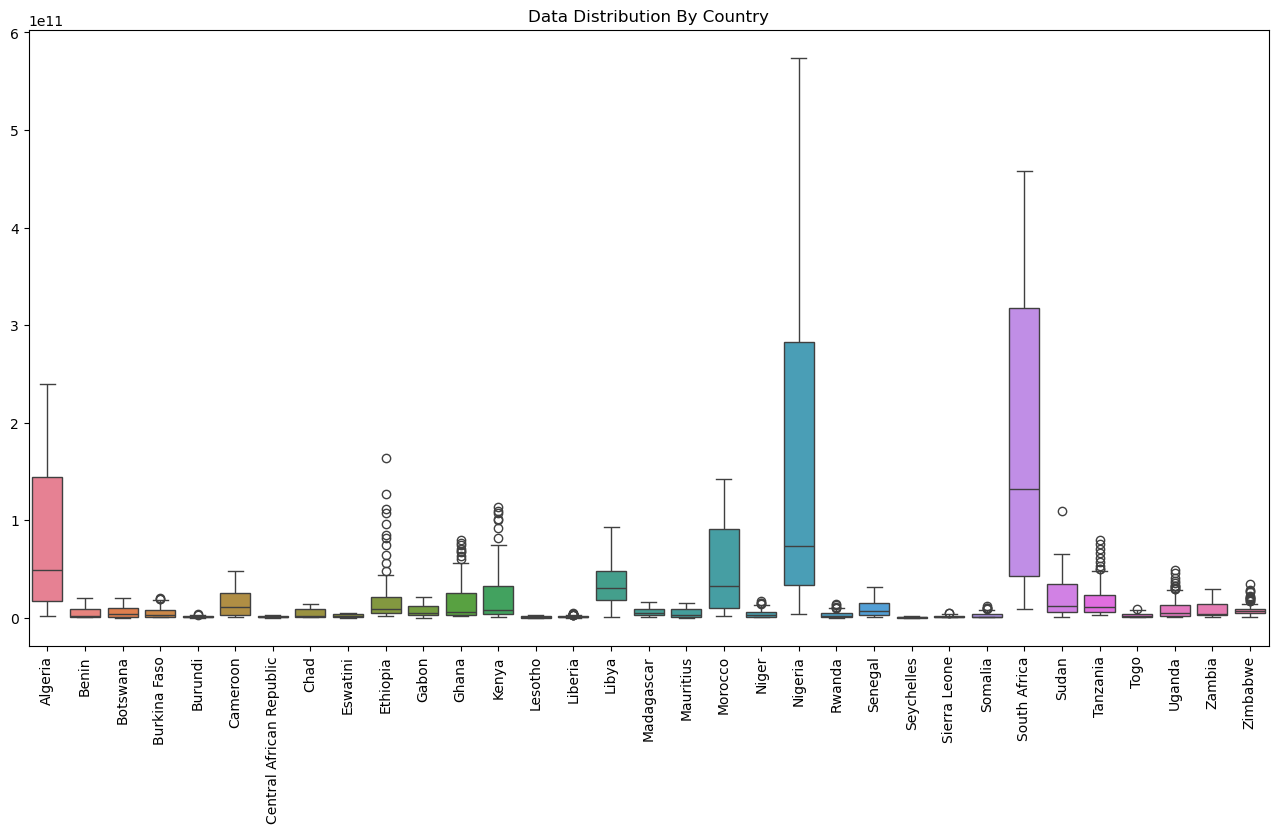

In [98]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.iloc[:, 1:])
plt.xticks(rotation=90)
plt.title('Data Distribution By Country')
plt.show()

#### Plot Distribution of GDP

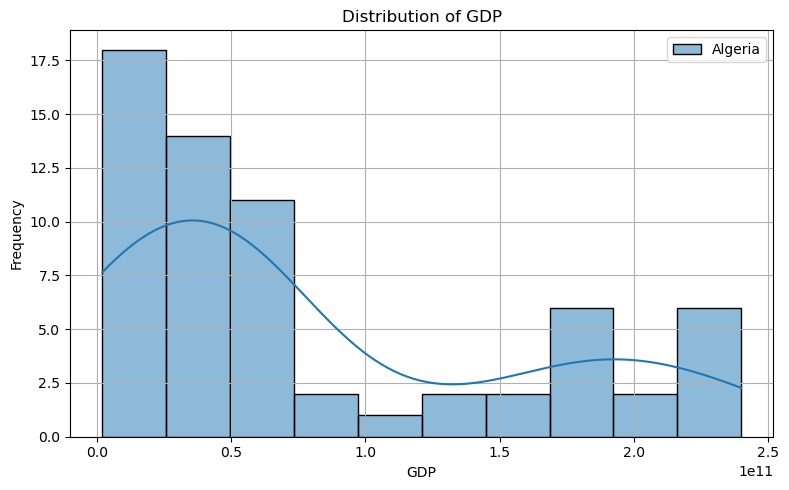

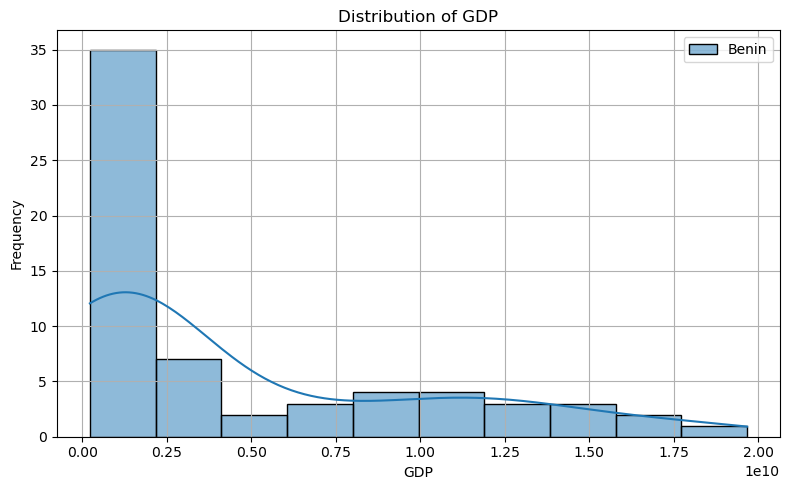

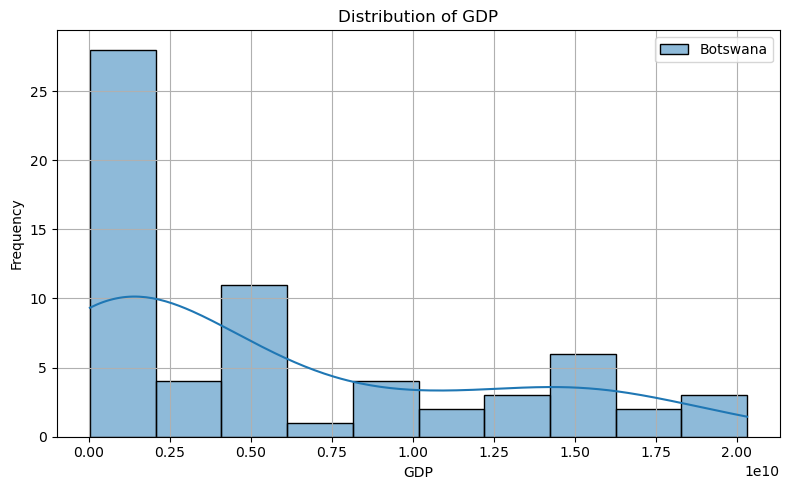

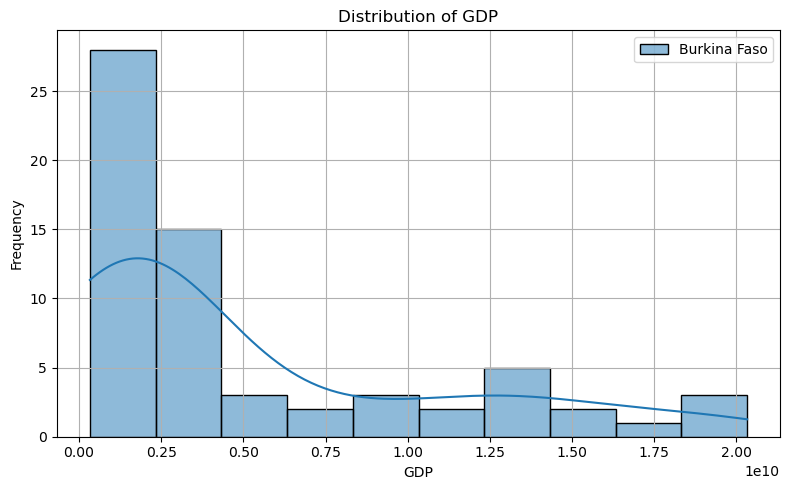

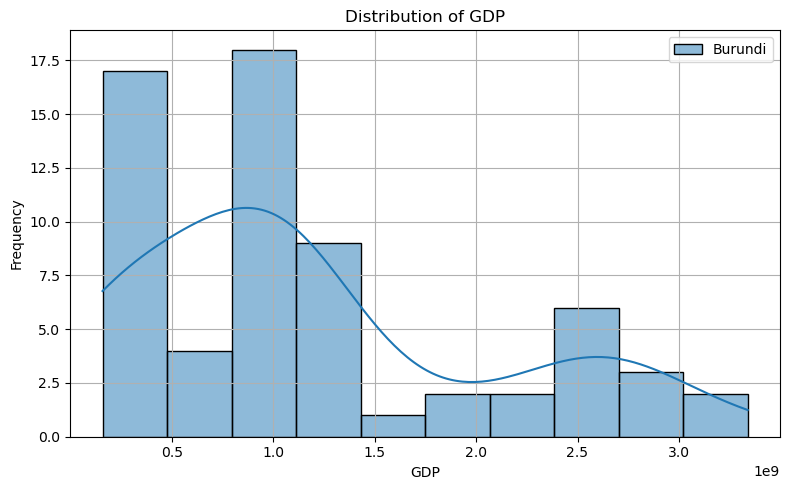

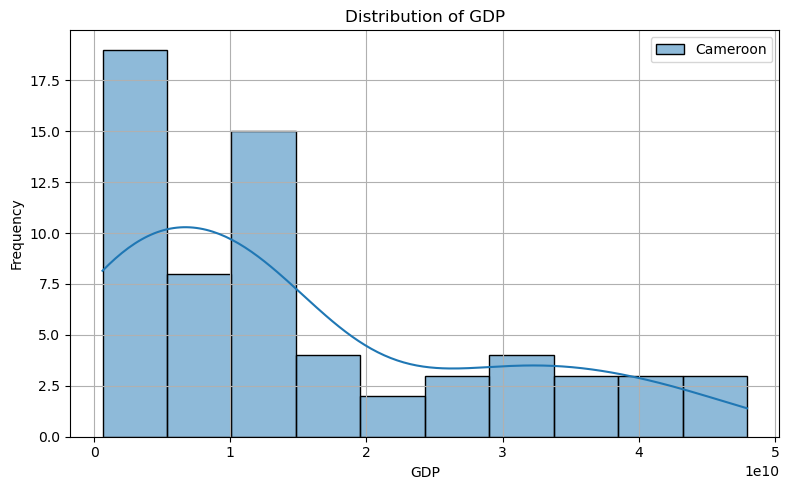

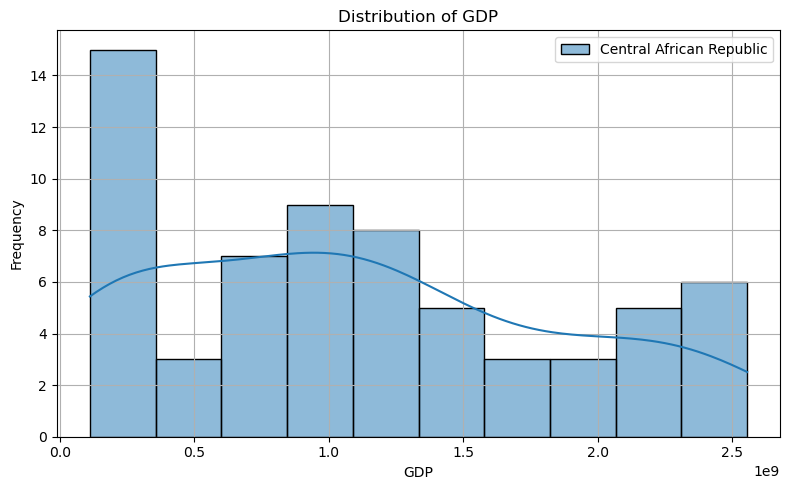

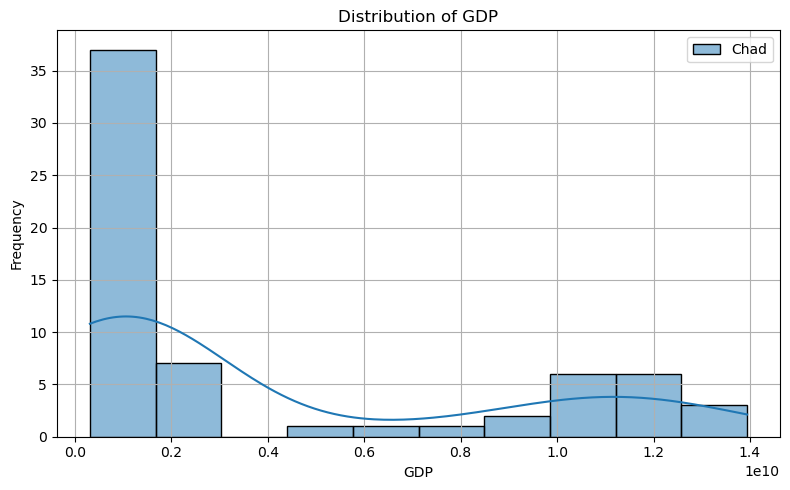

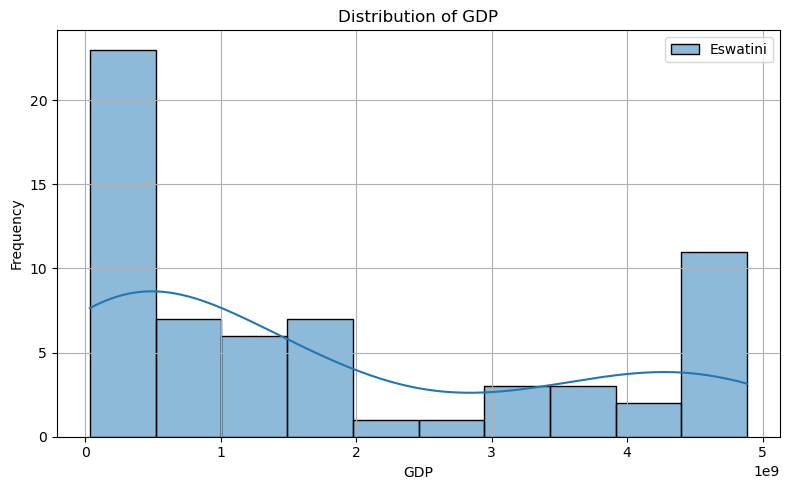

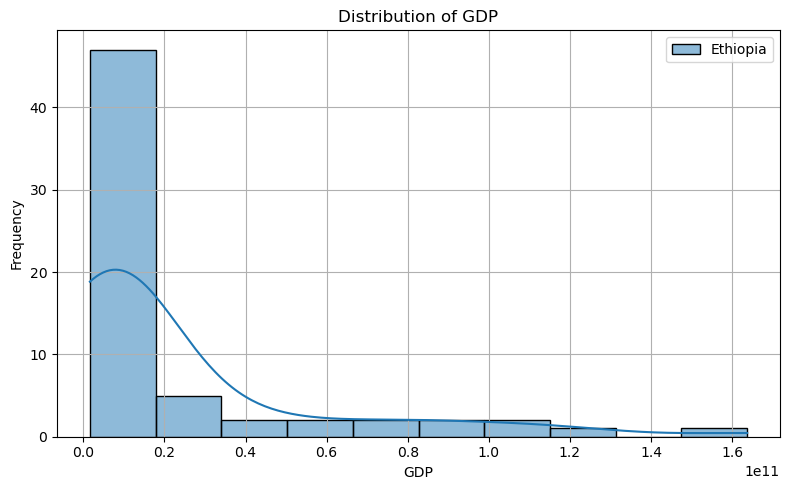

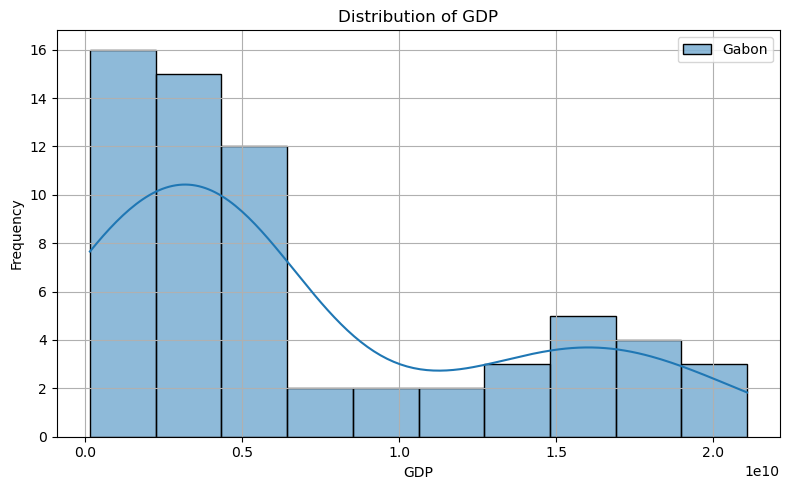

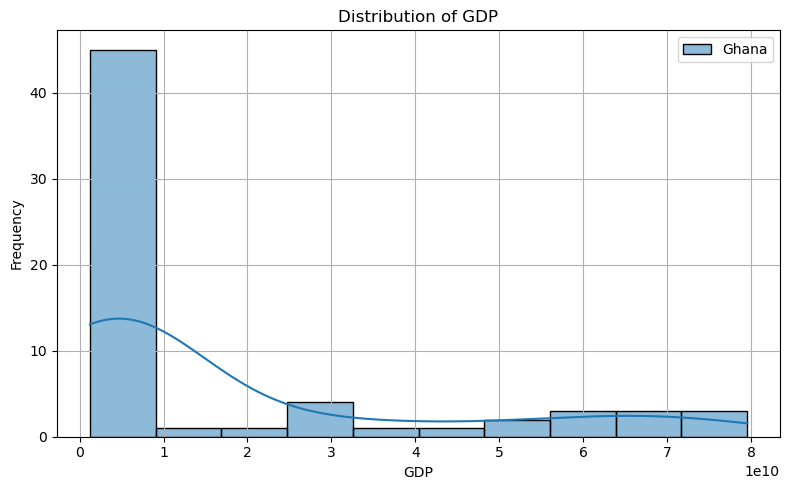

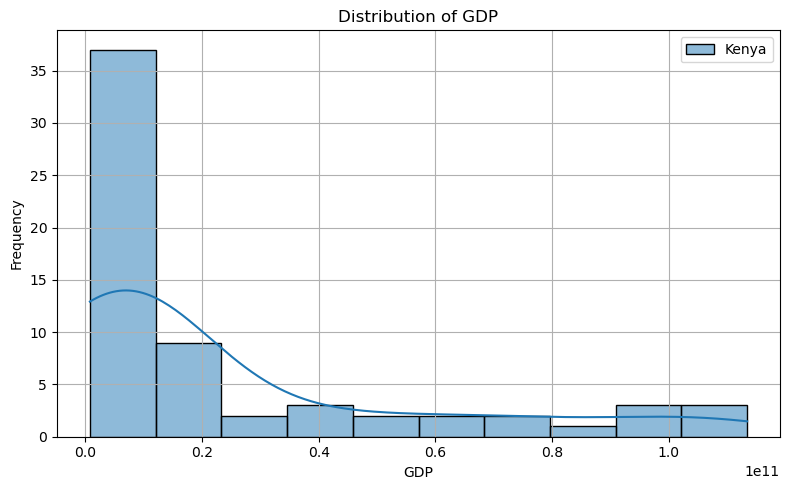

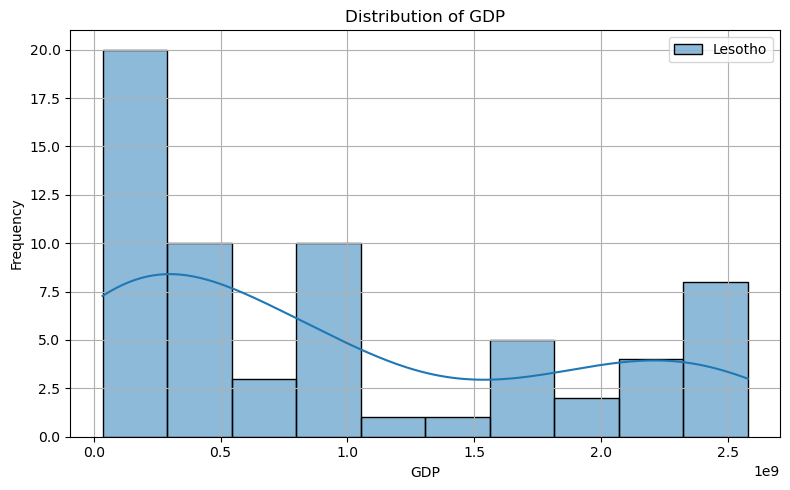

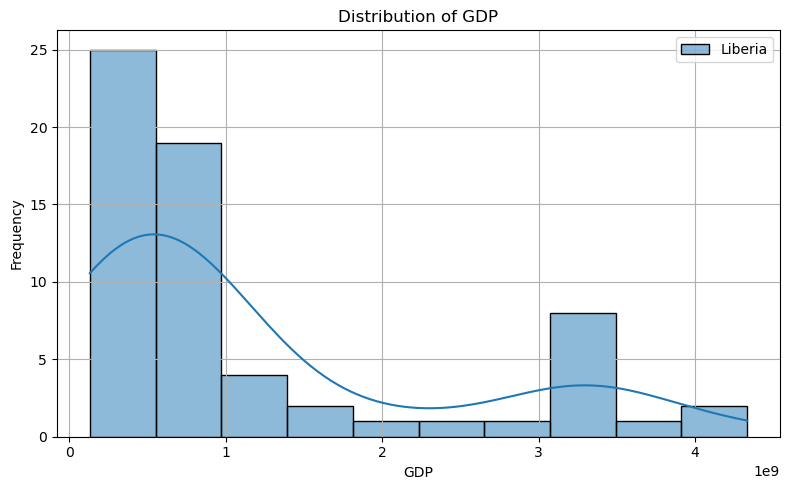

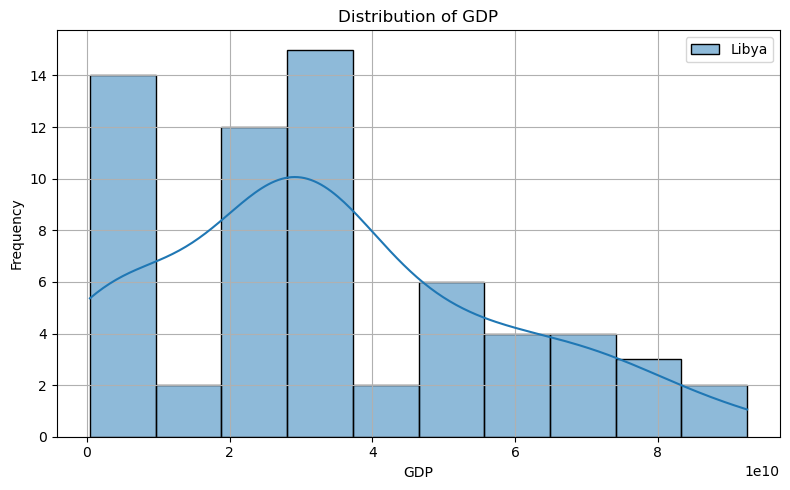

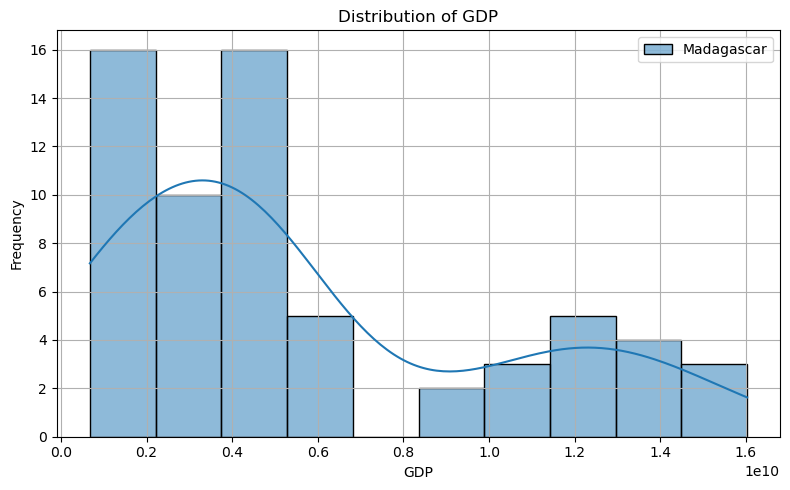

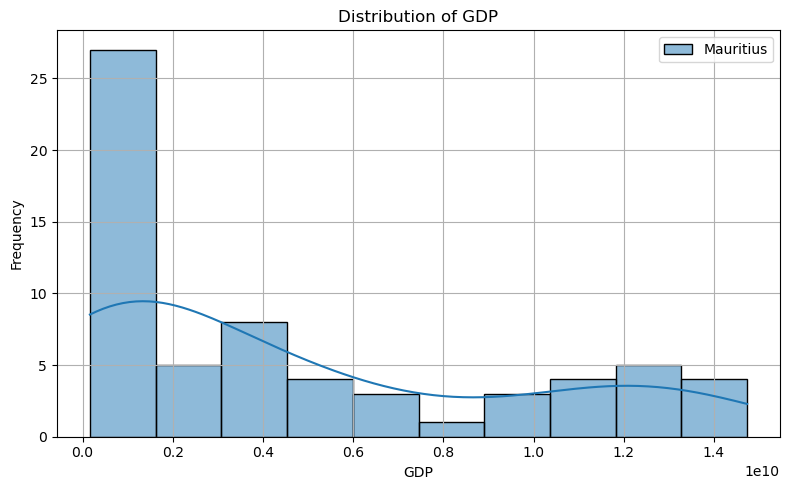

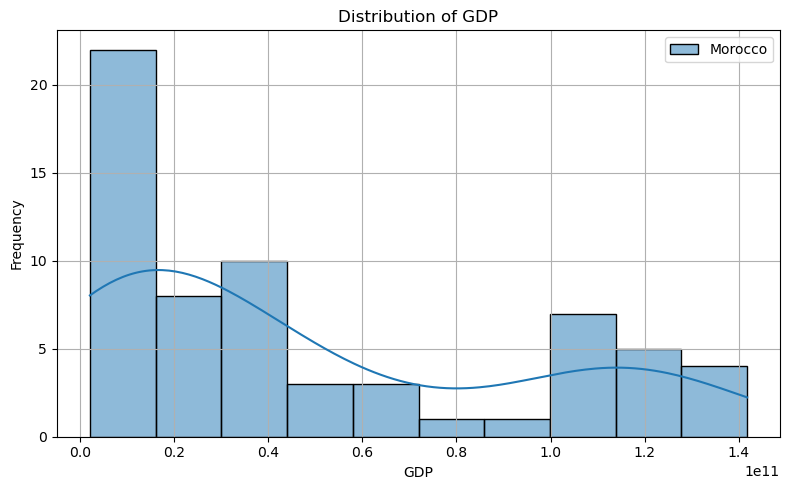

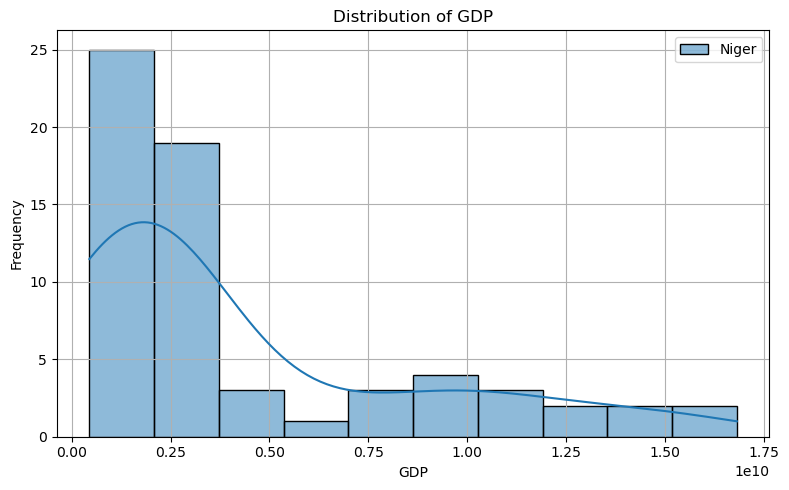

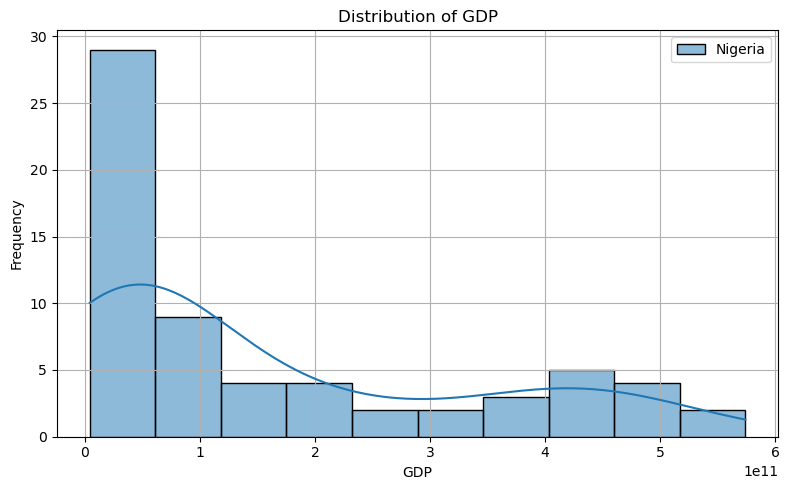

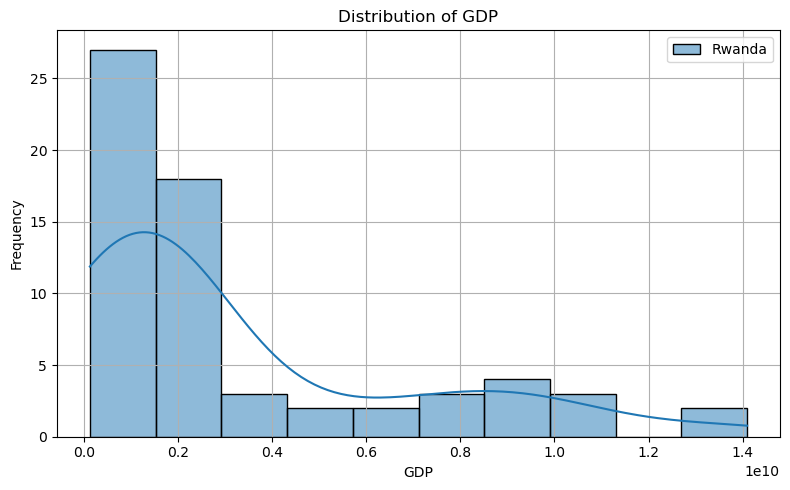

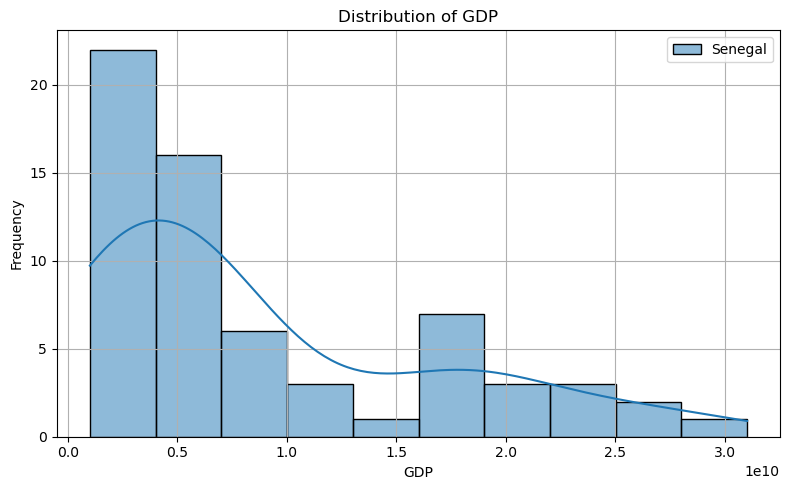

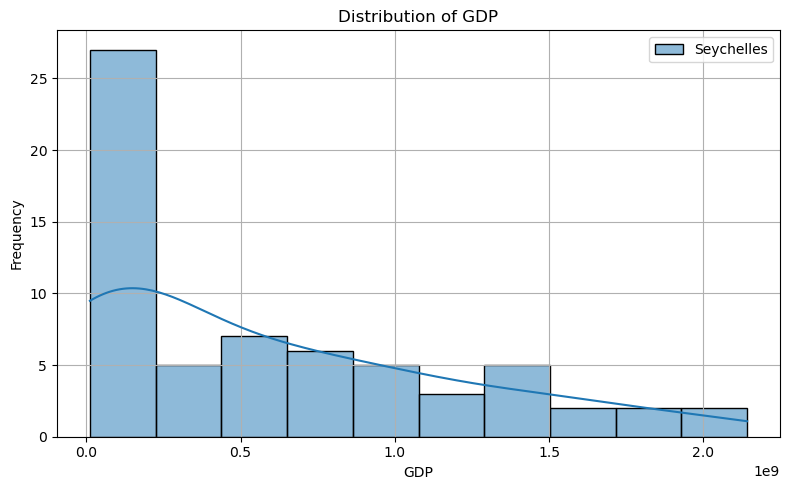

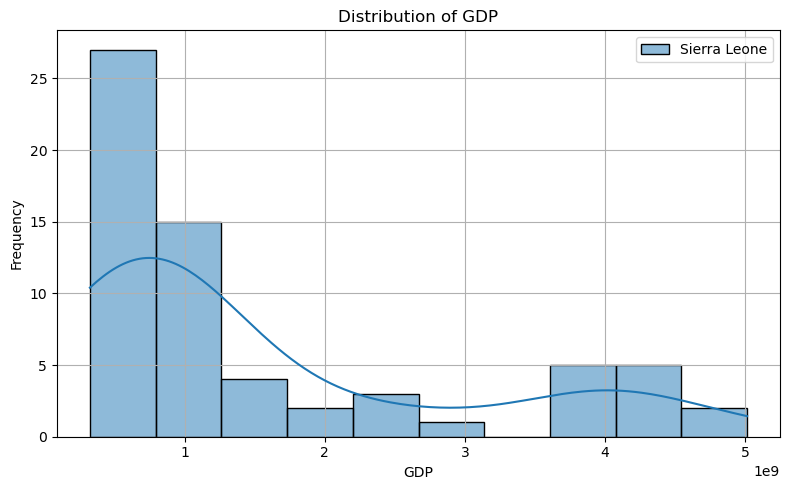

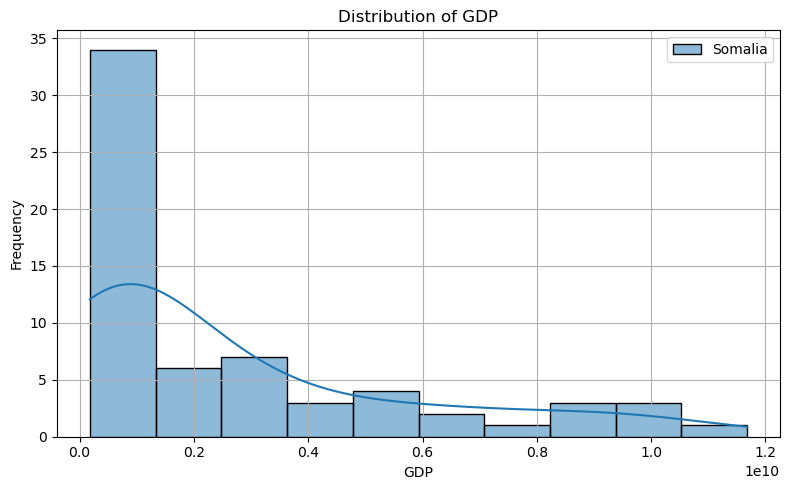

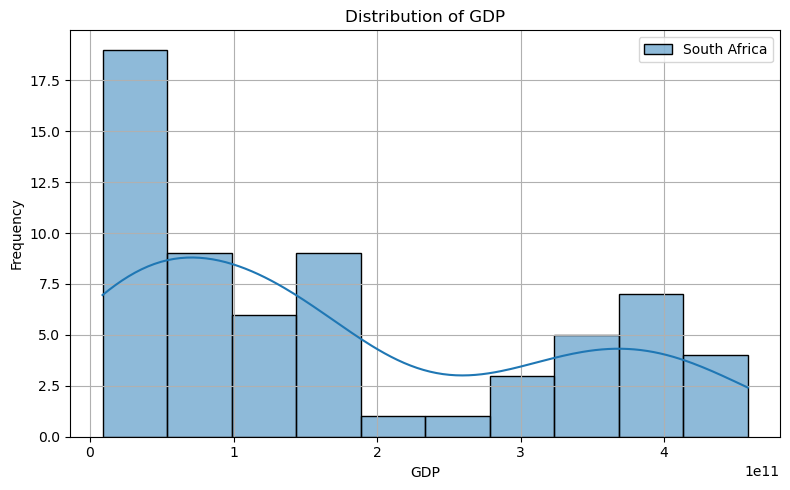

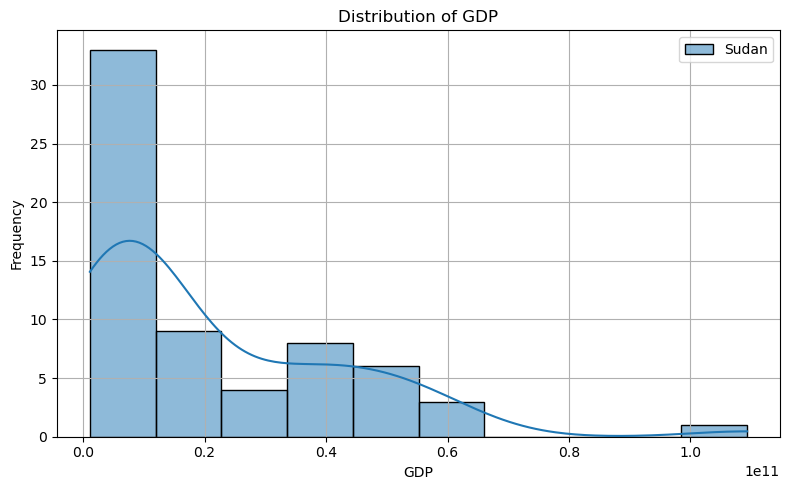

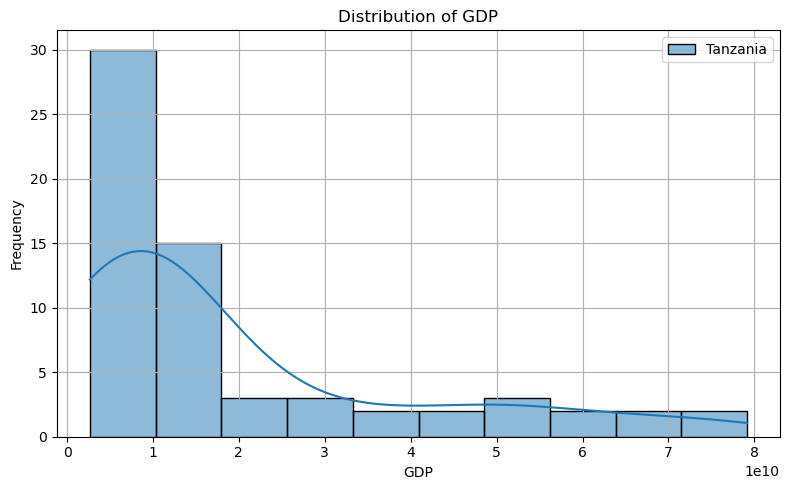

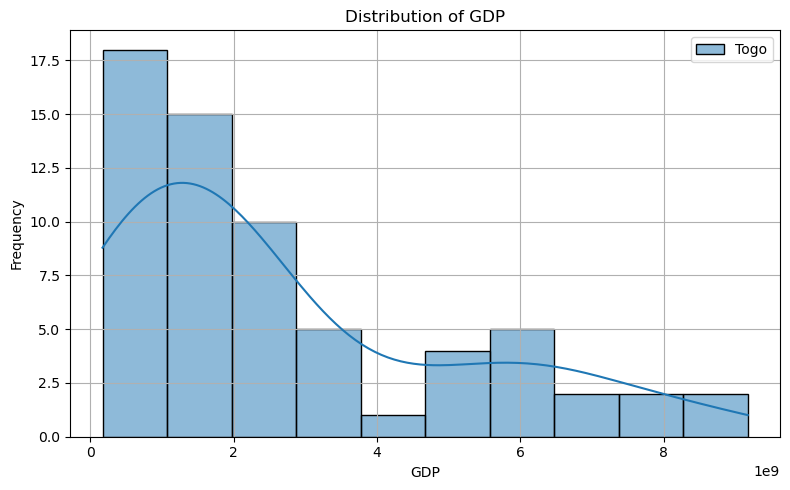

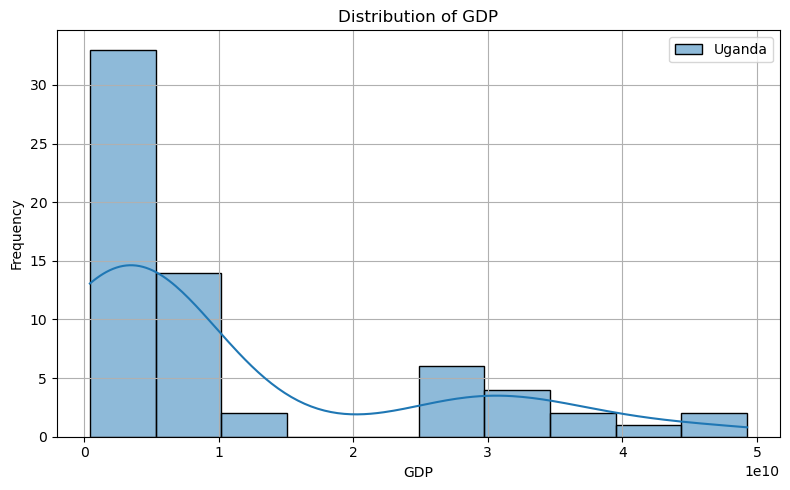

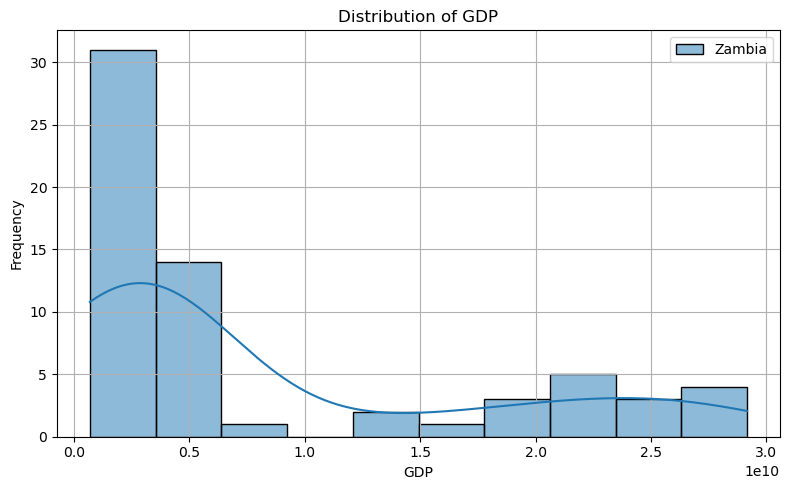

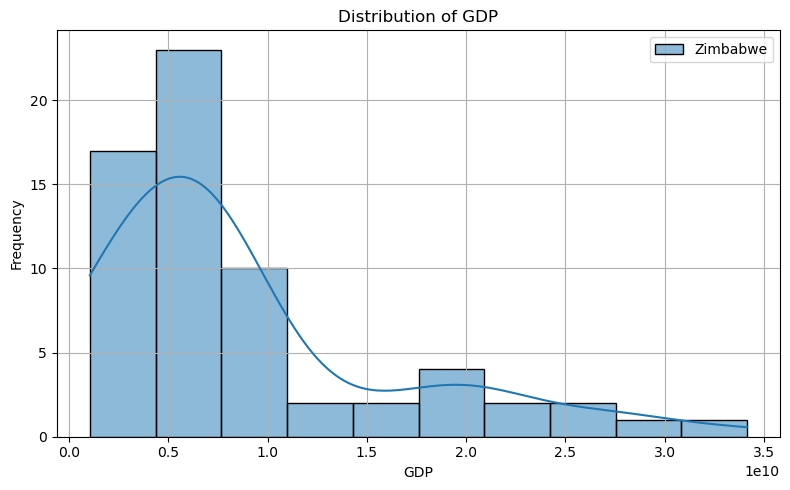

In [149]:
for country in df.columns[1:]:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[[country]], kde=True, color='turquoise', bins=10)
    plt.title('Distribution of GDP')
    plt.xlabel('GDP')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.grid()
    plt.show()

#### Plot Distribution by Year per Country

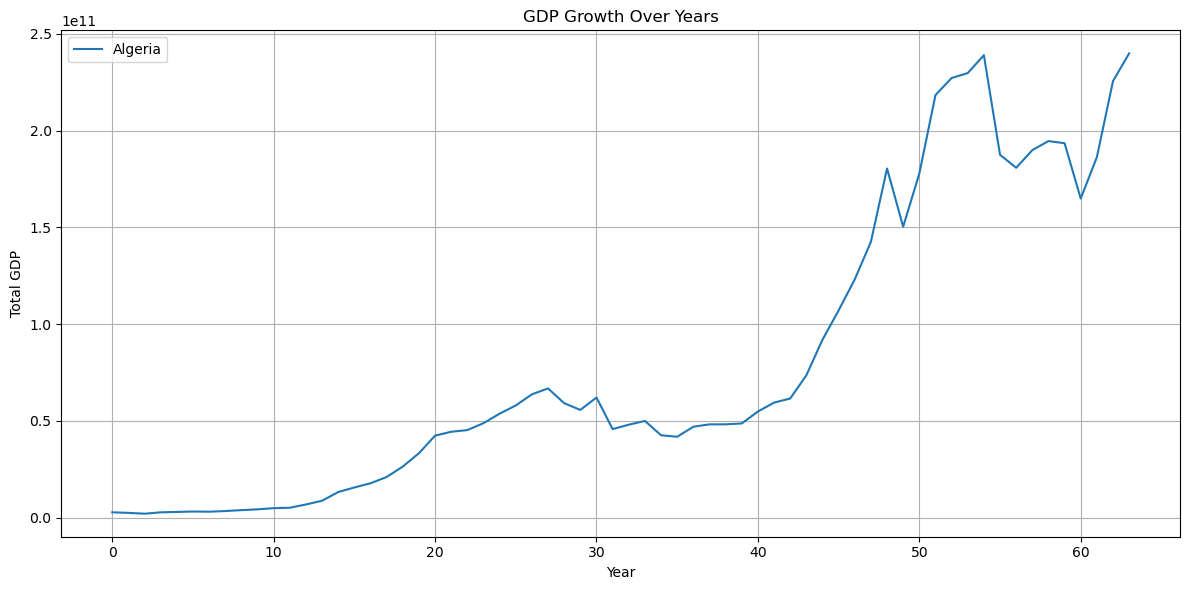

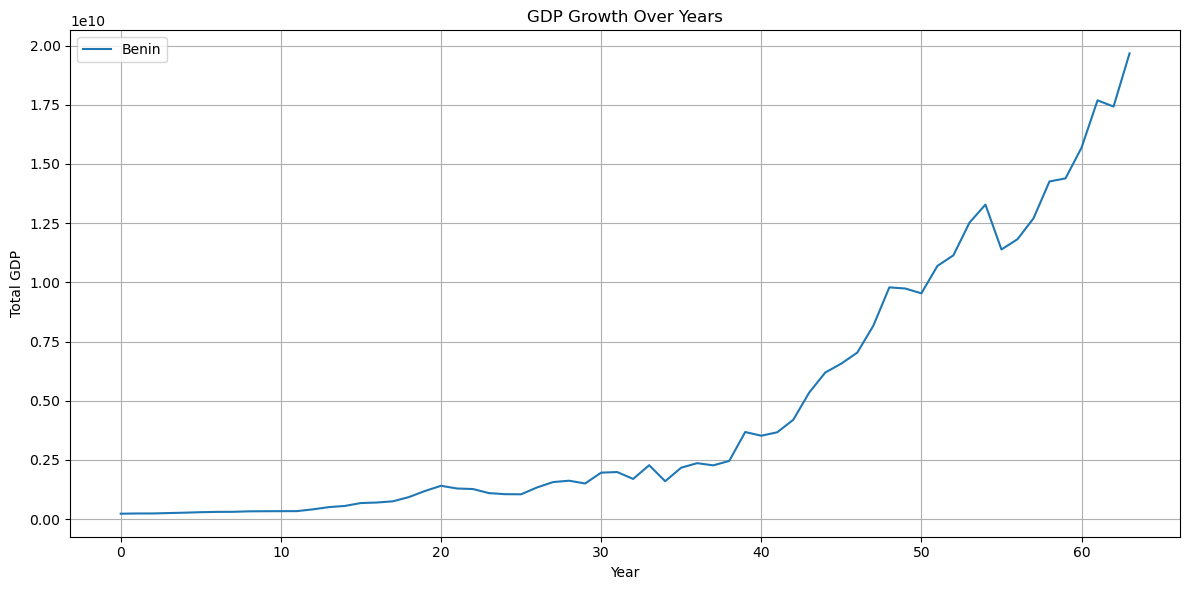

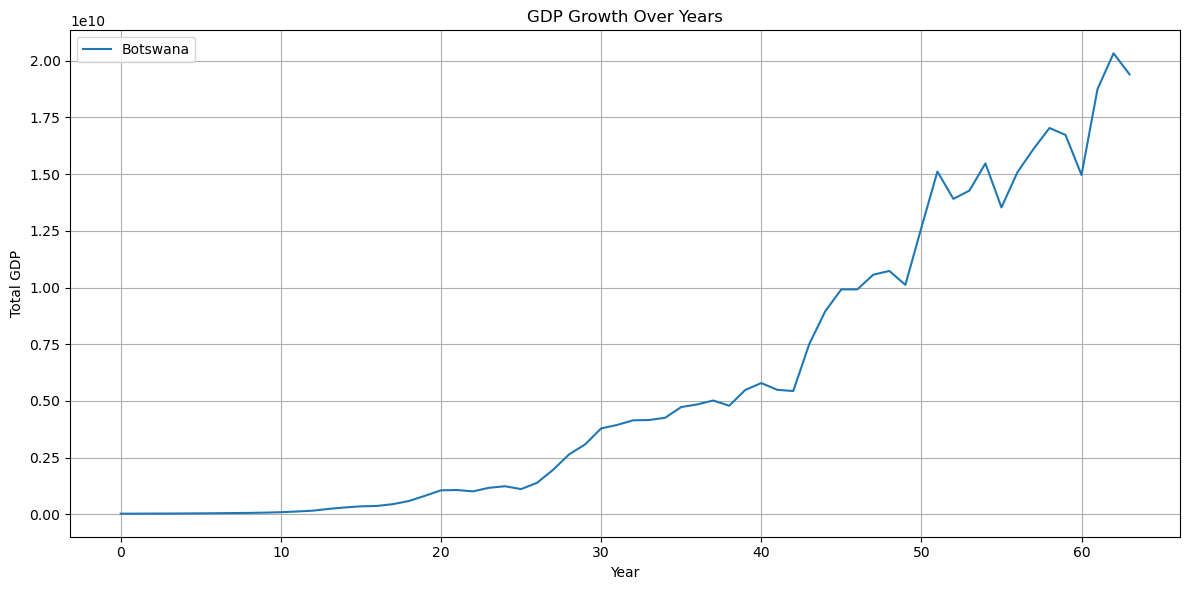

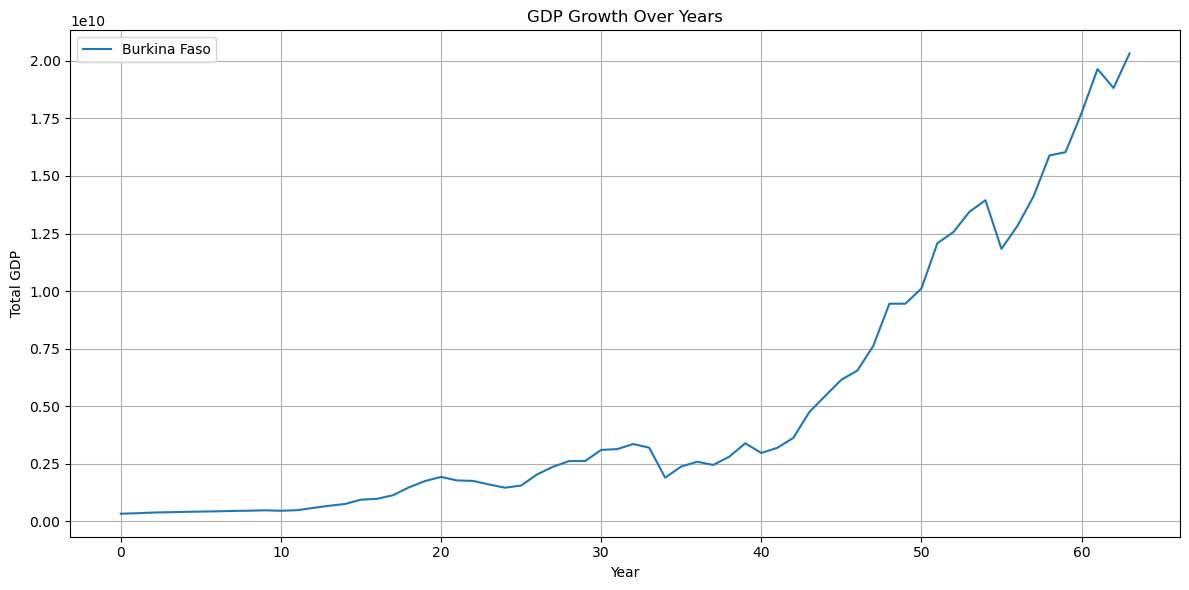

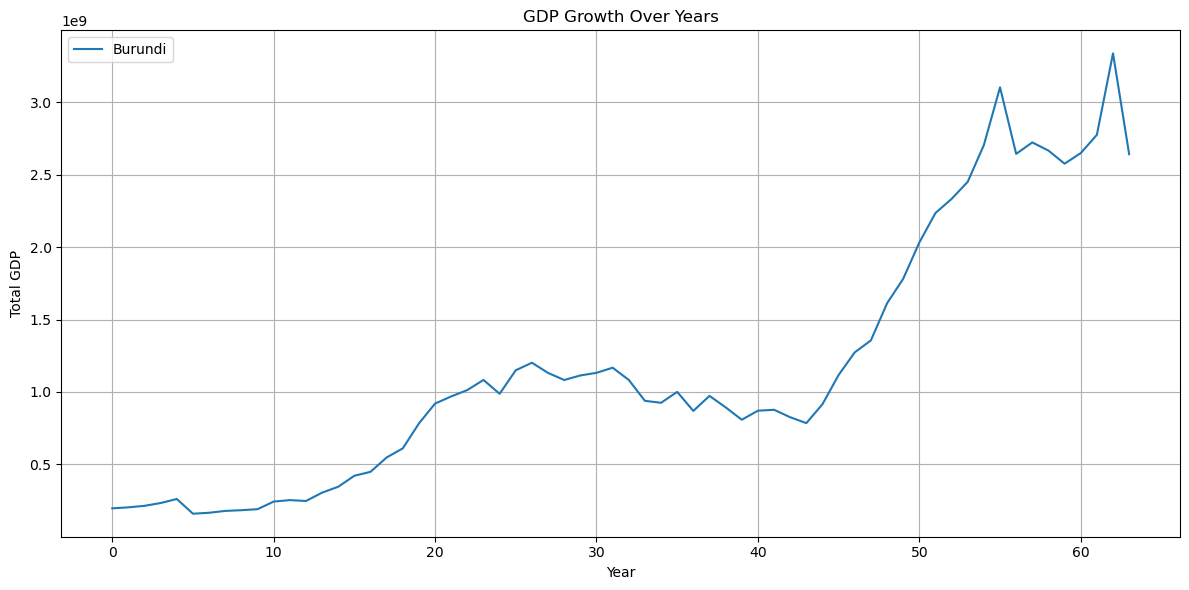

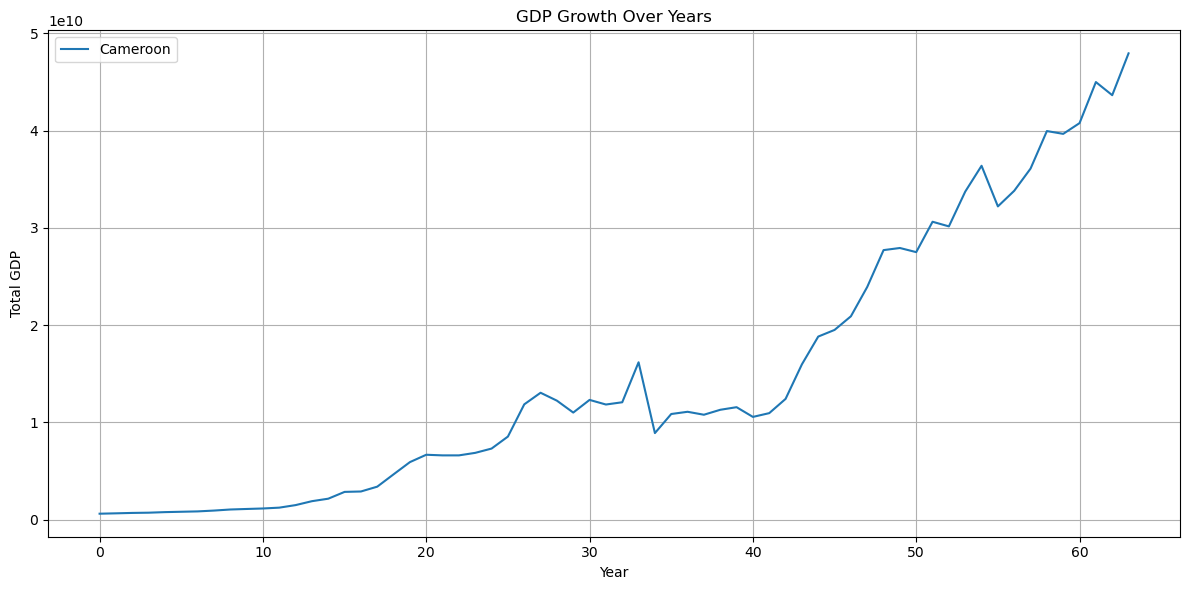

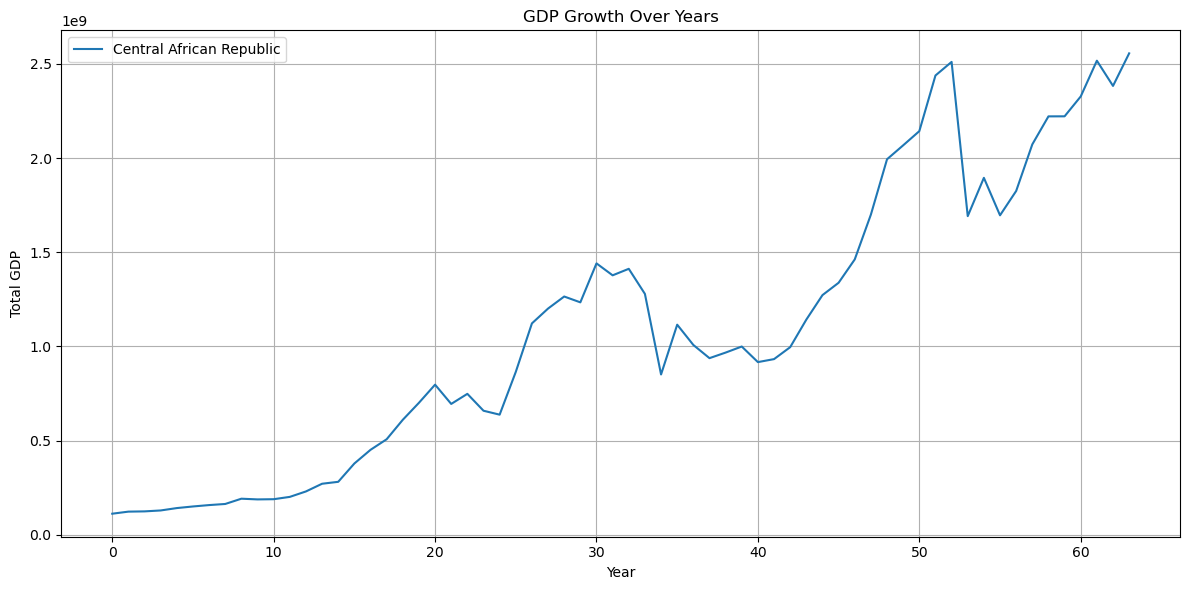

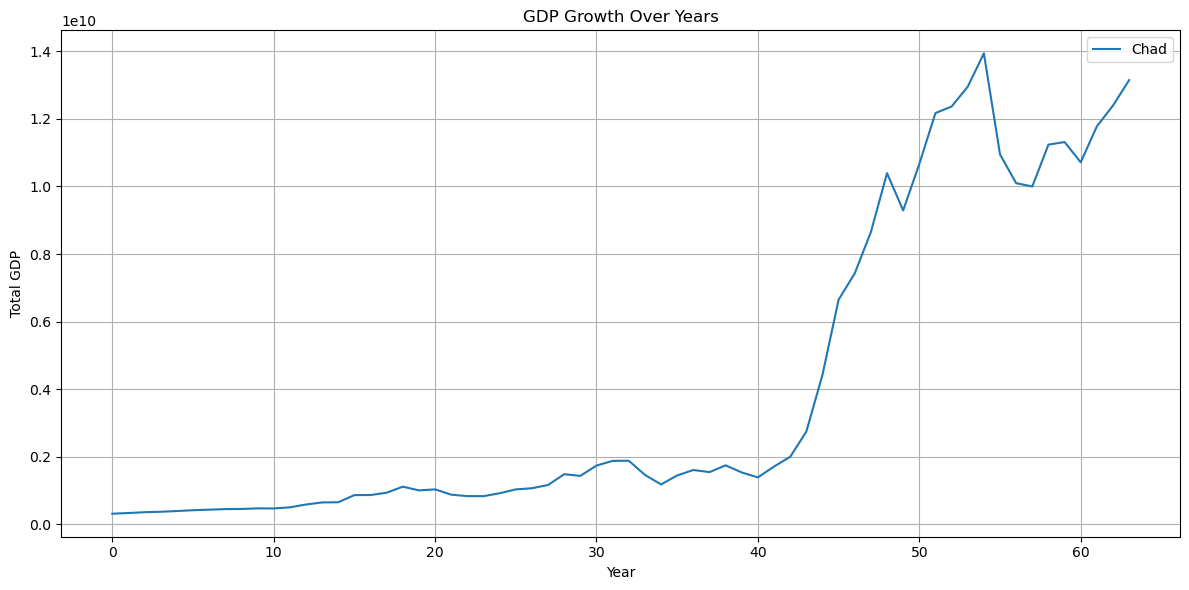

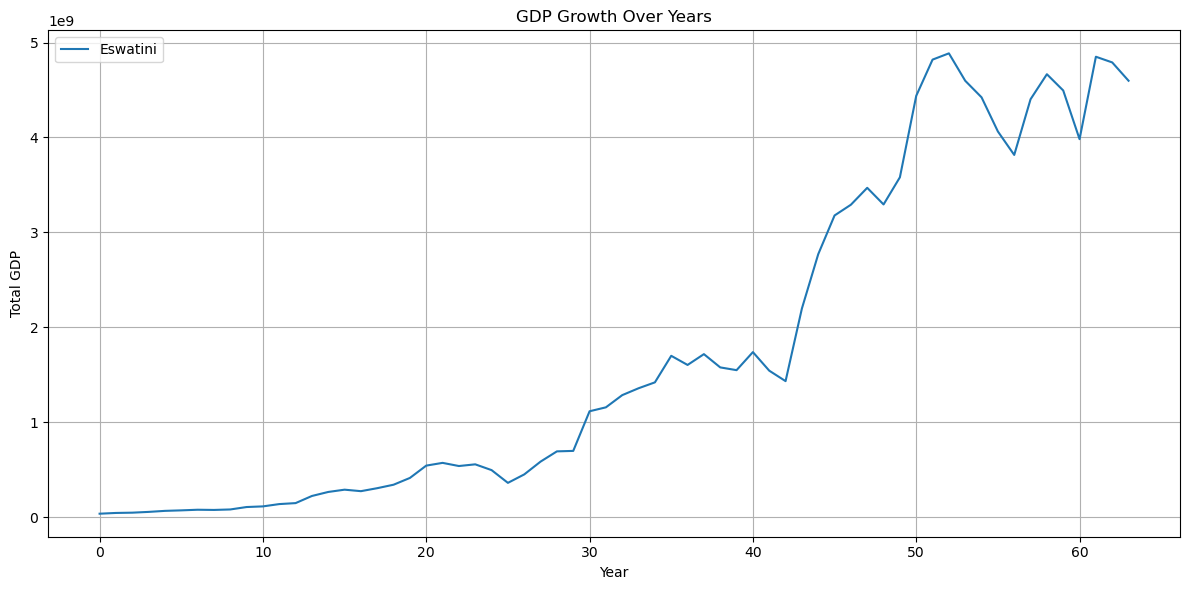

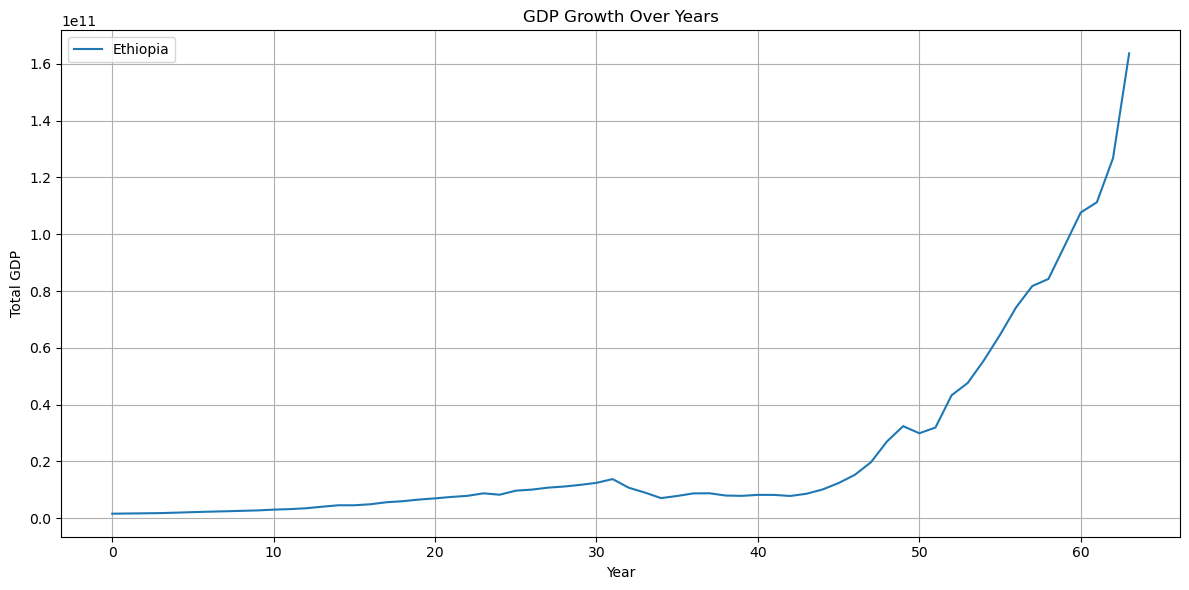

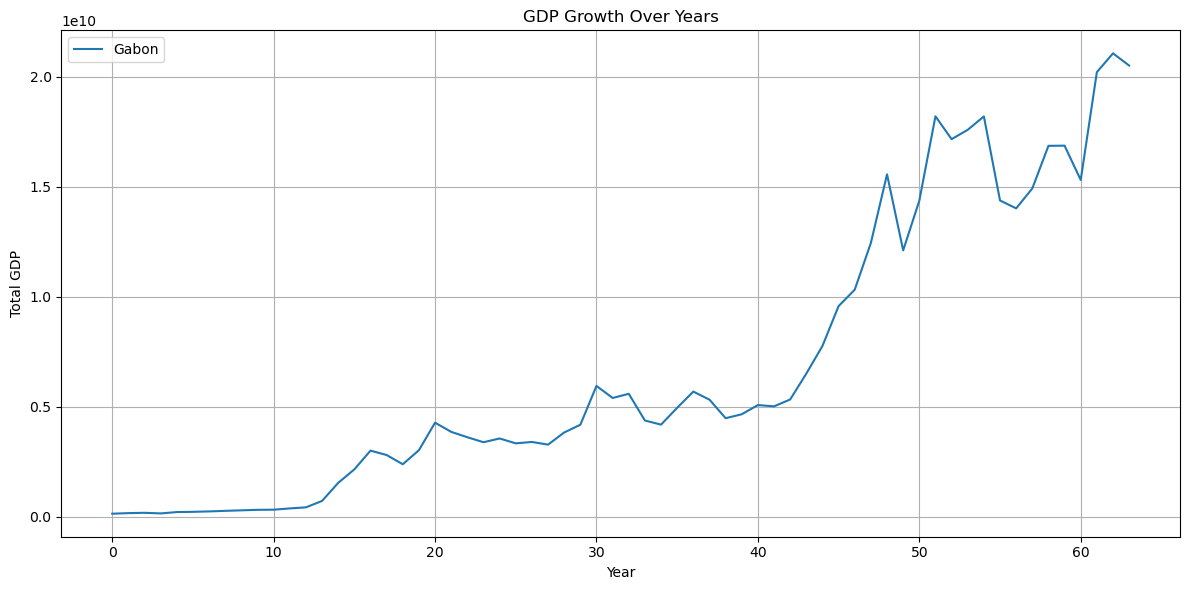

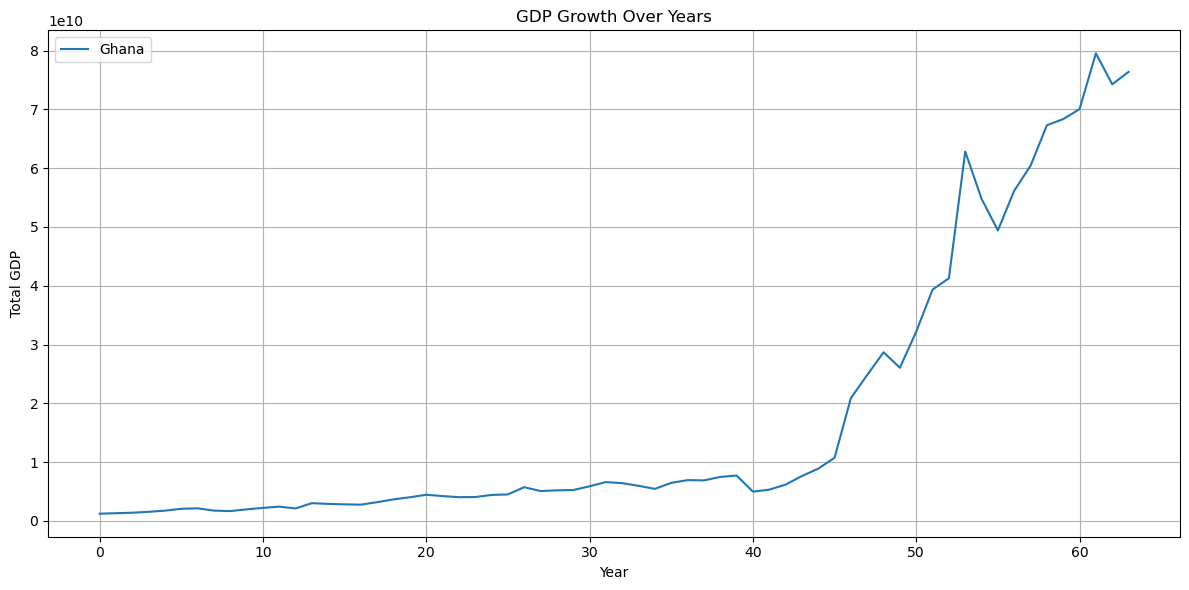

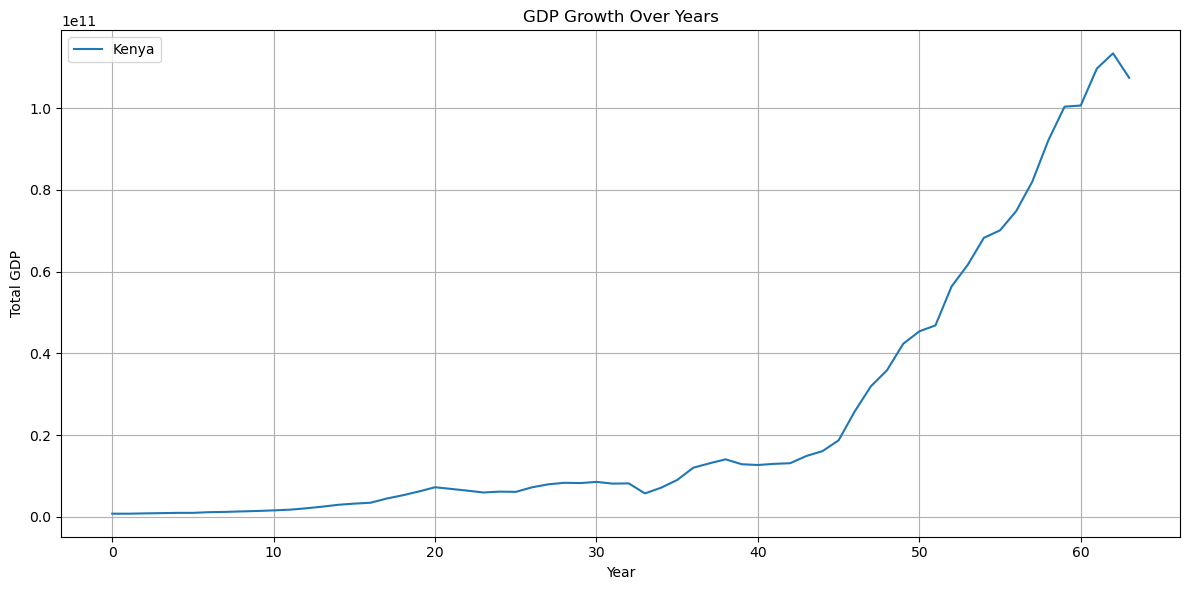

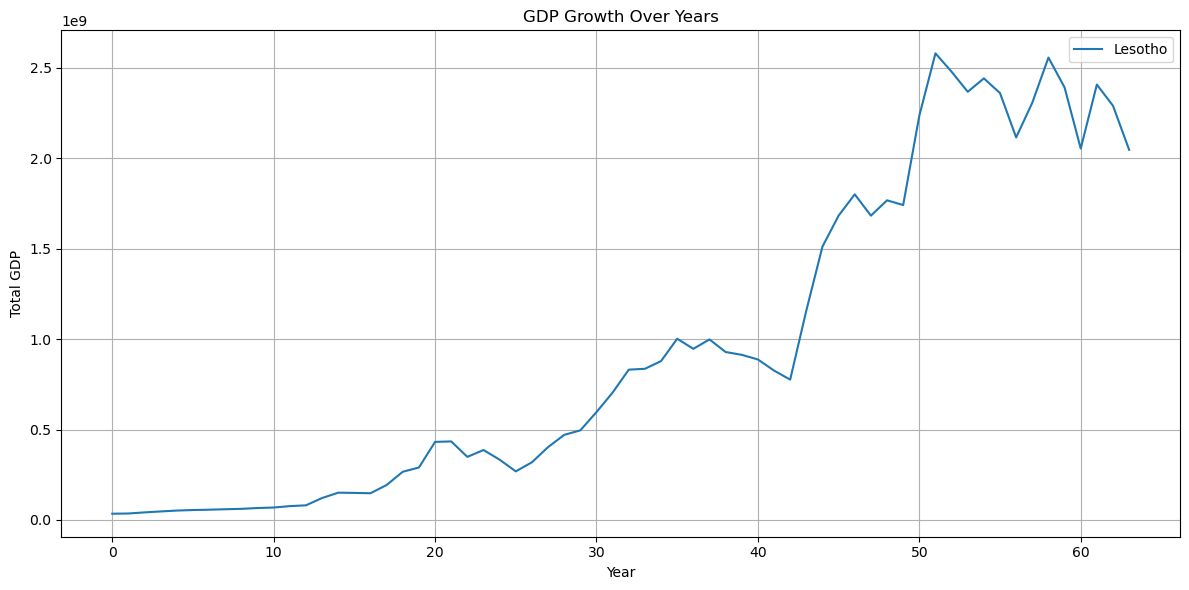

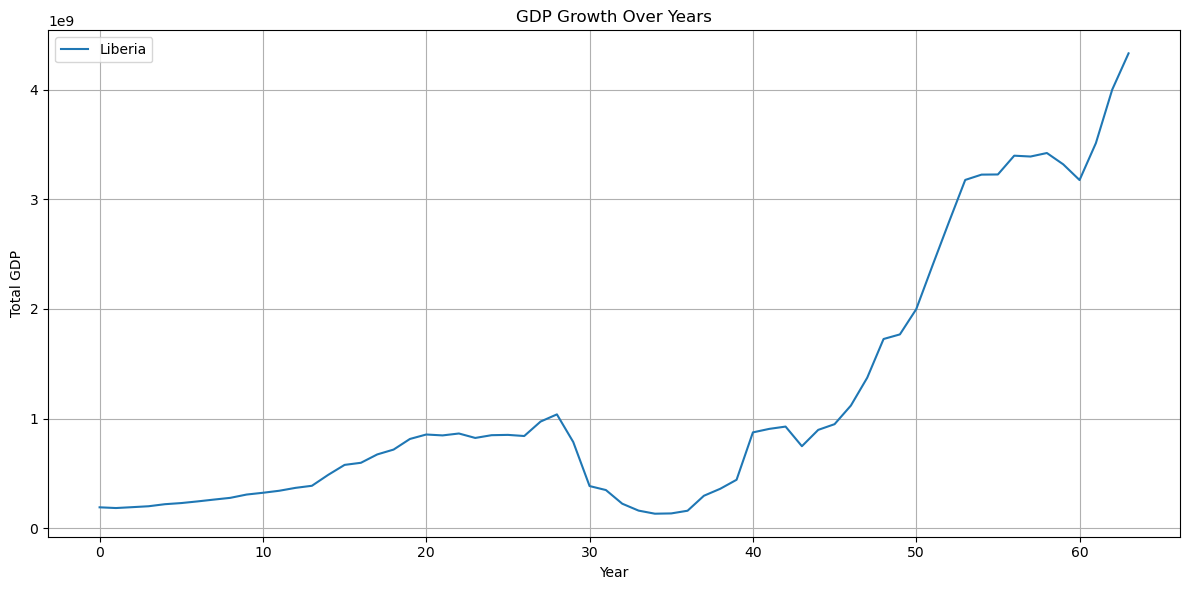

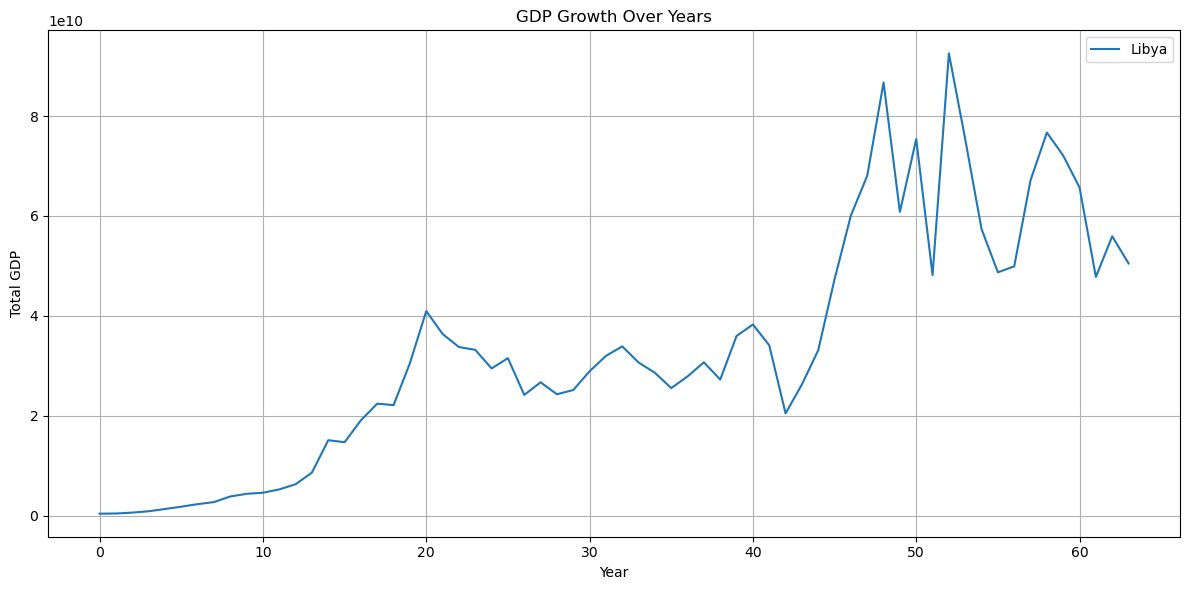

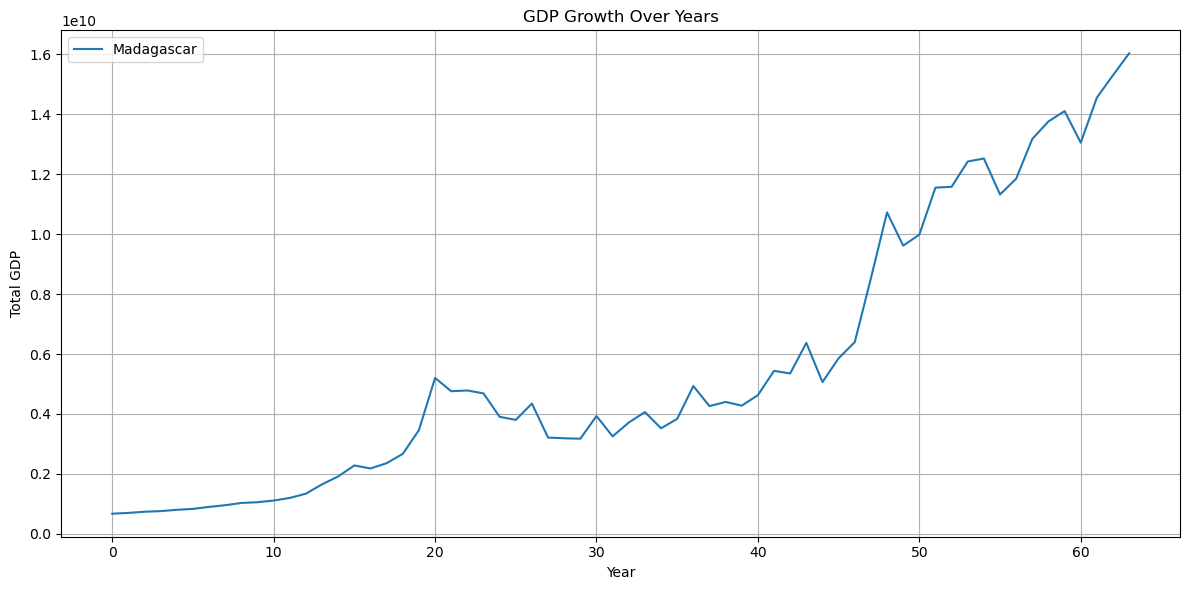

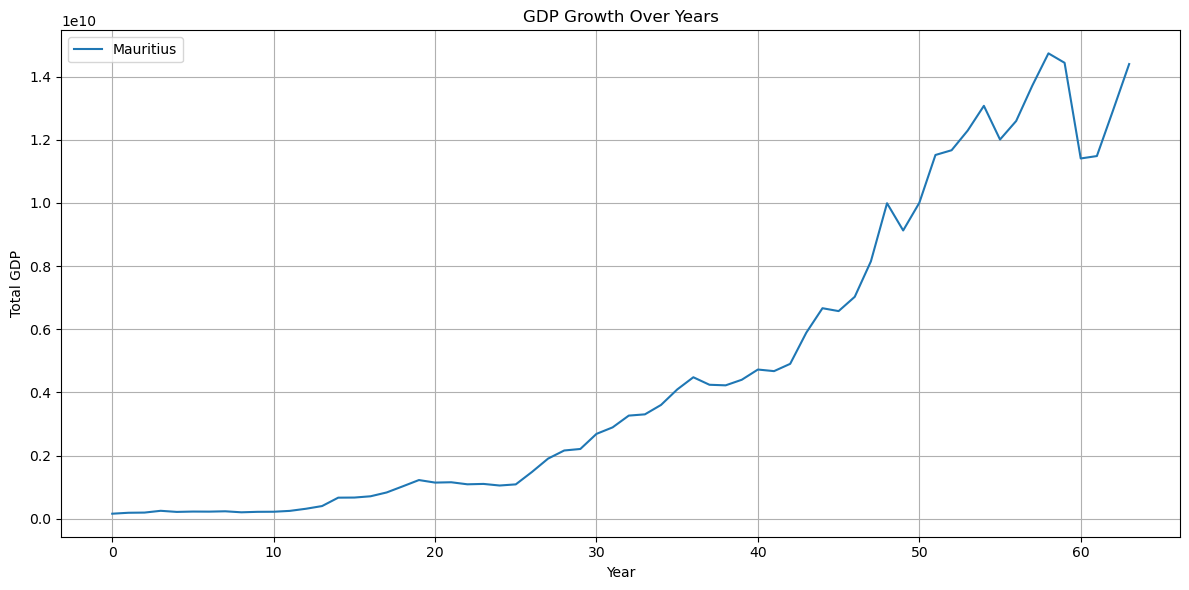

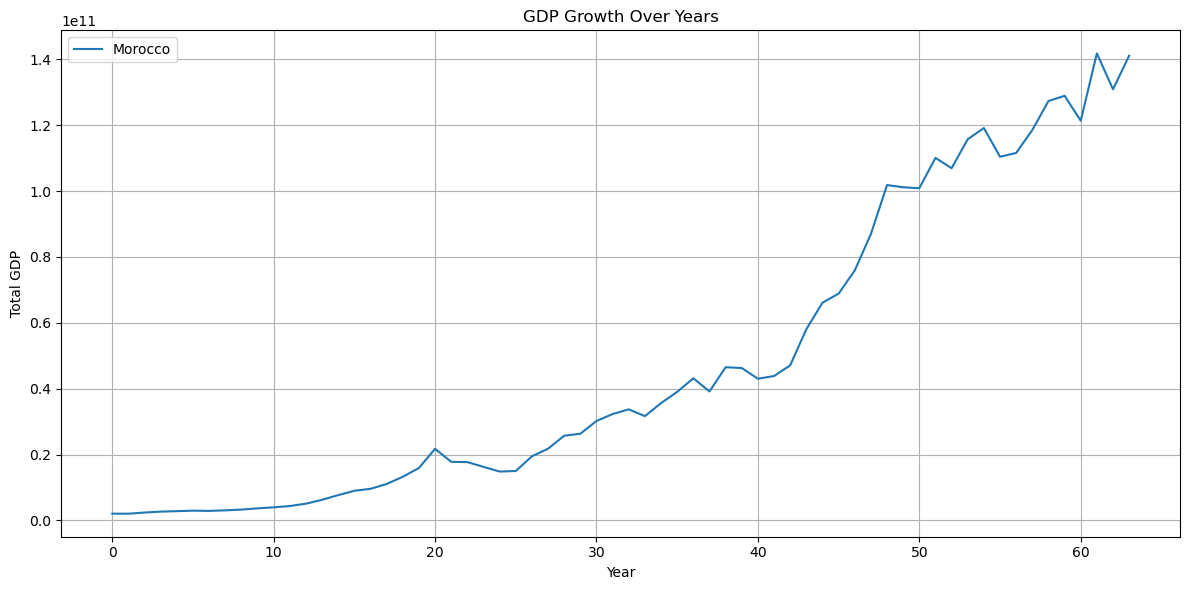

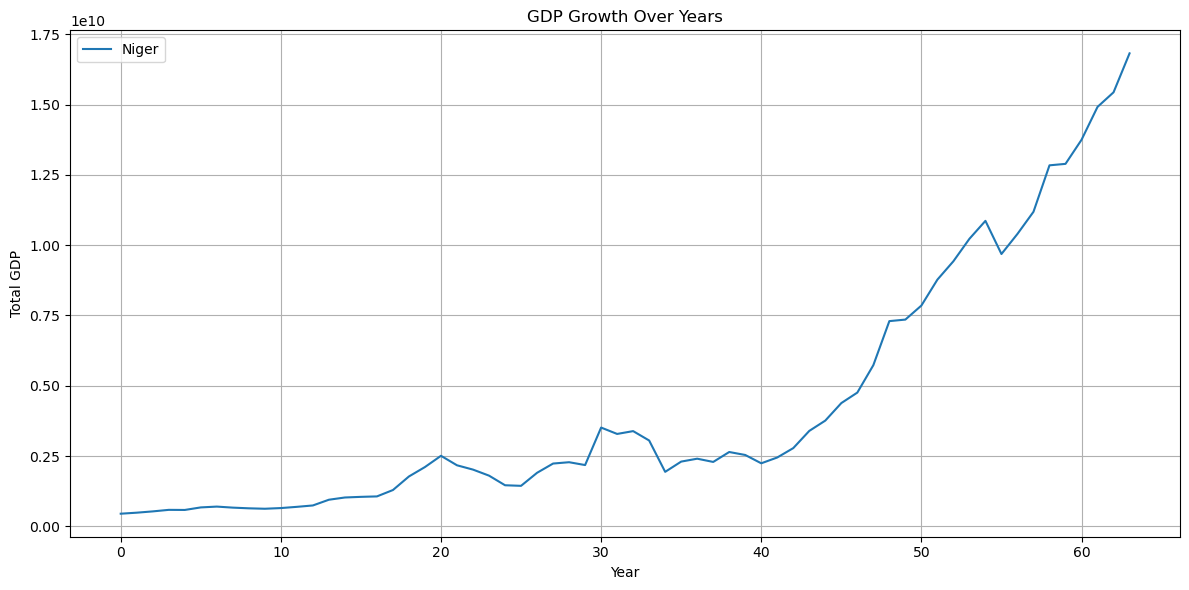

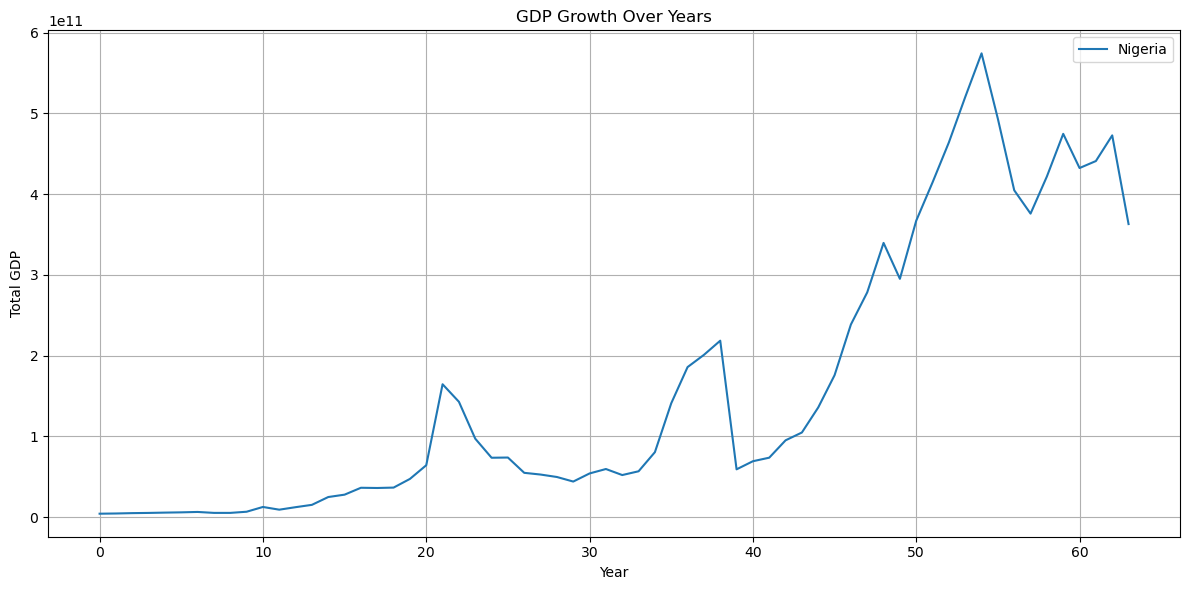

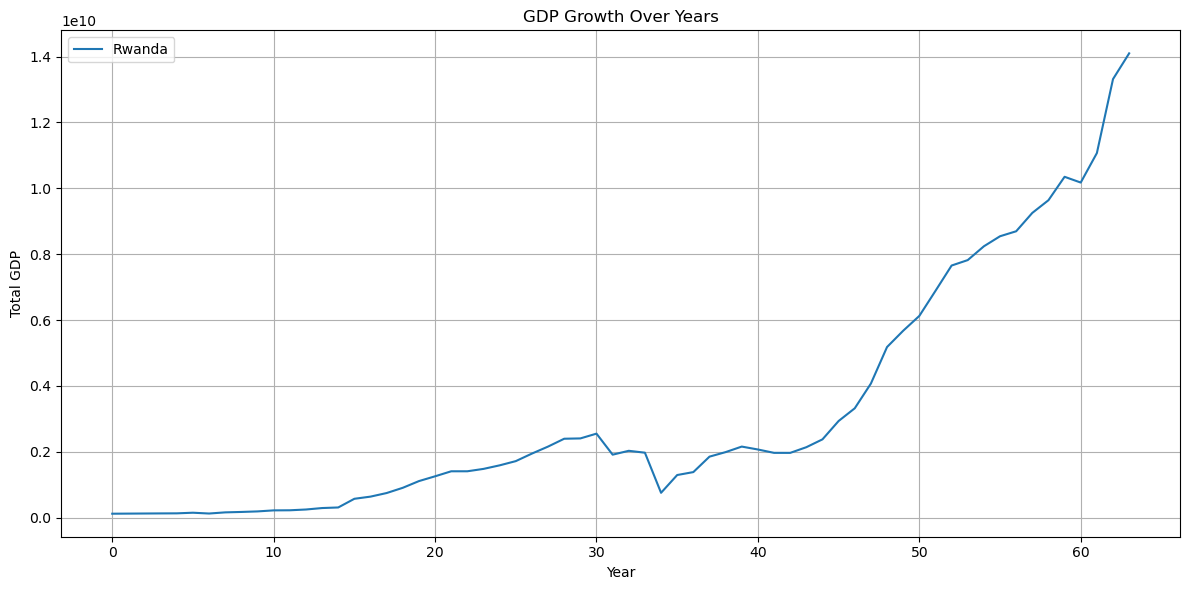

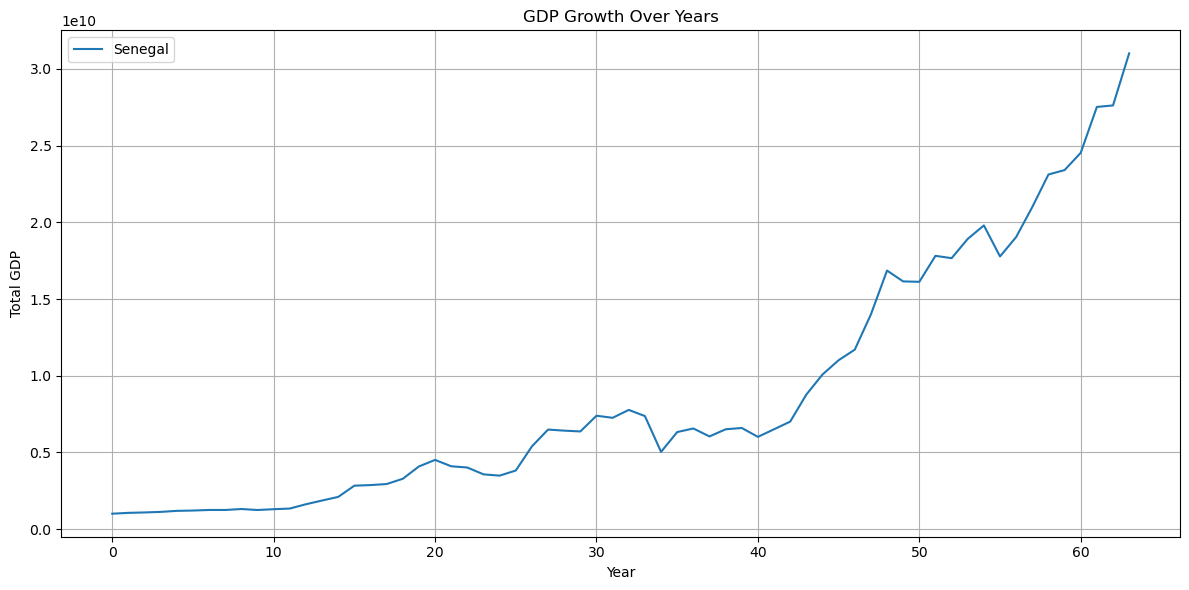

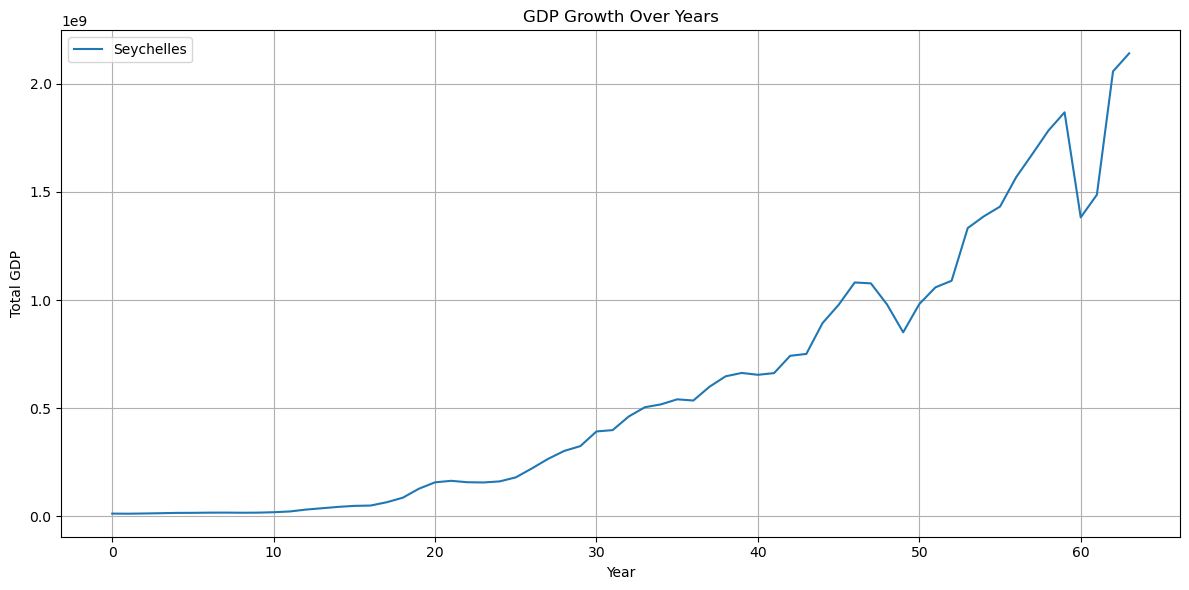

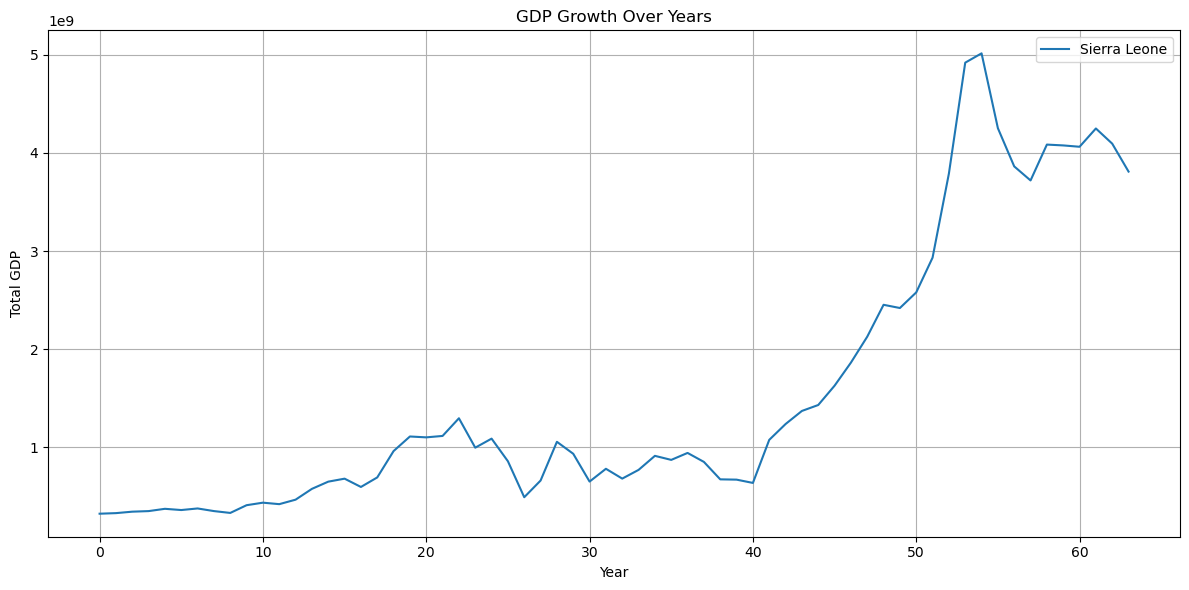

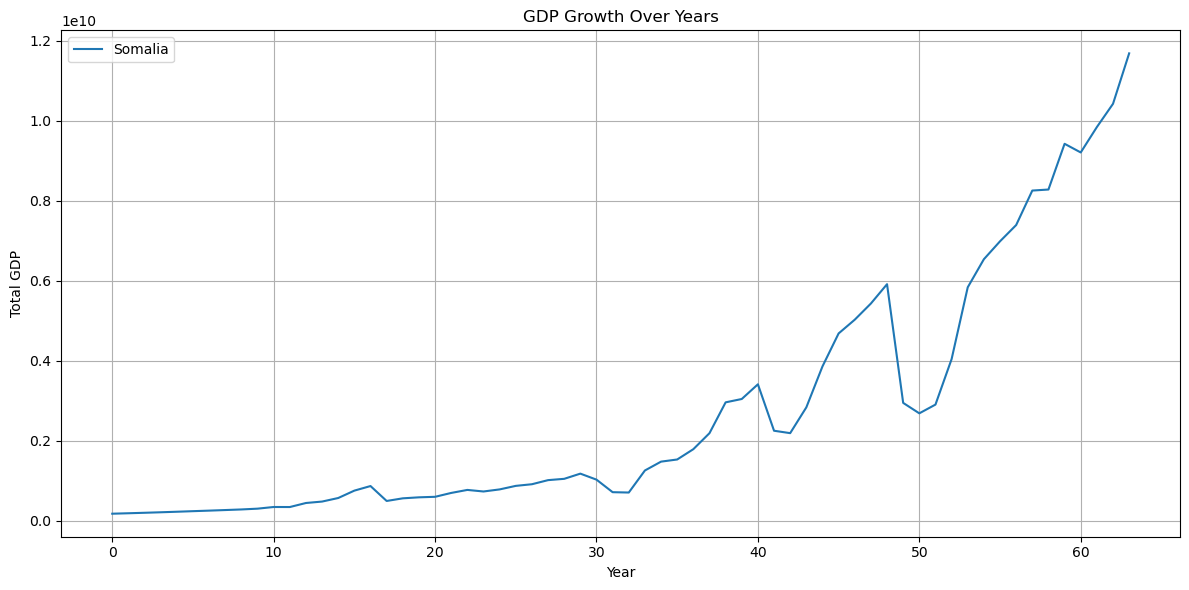

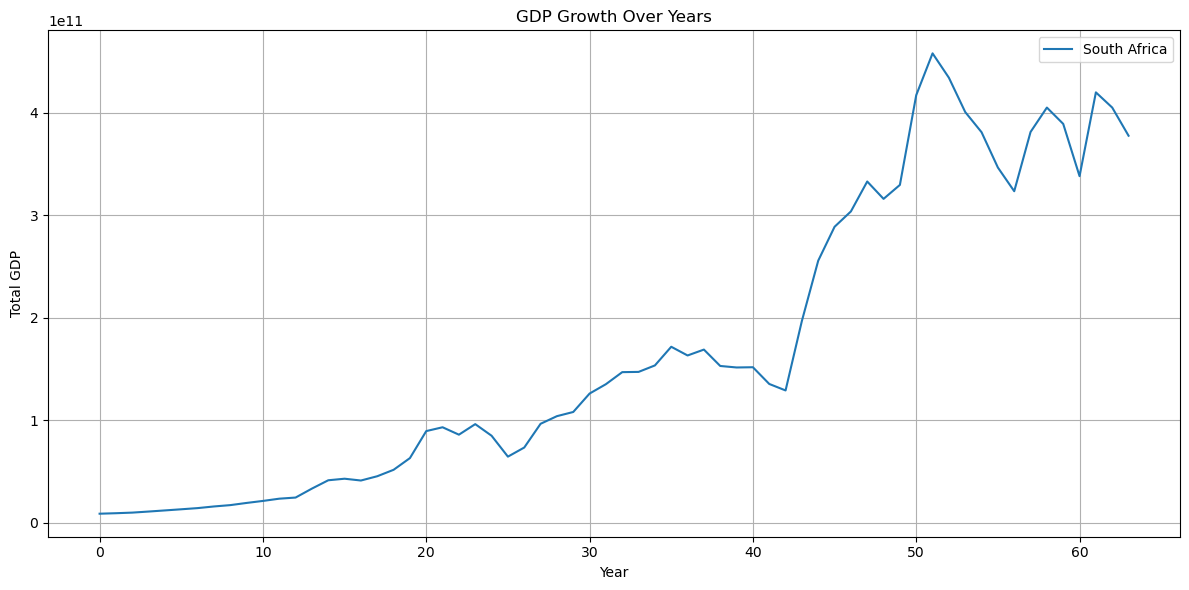

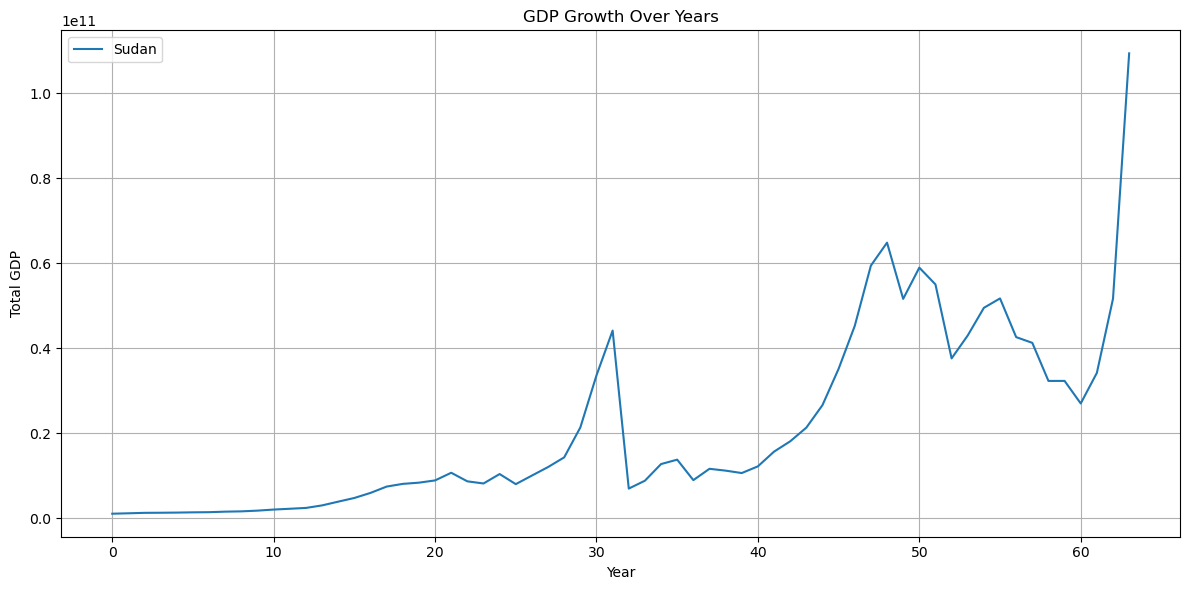

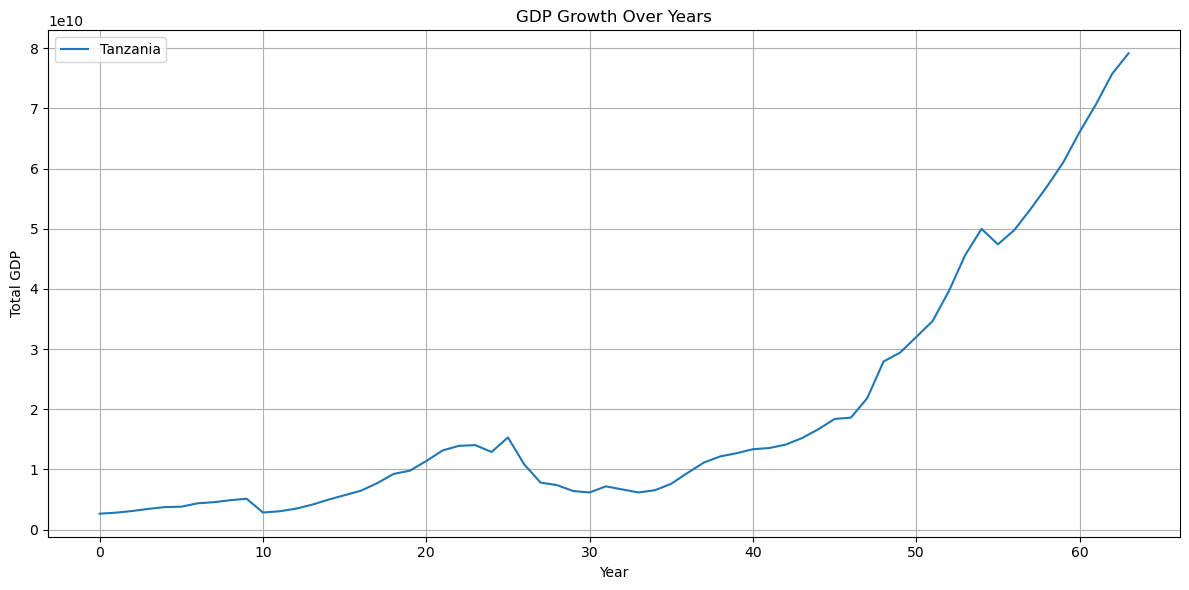

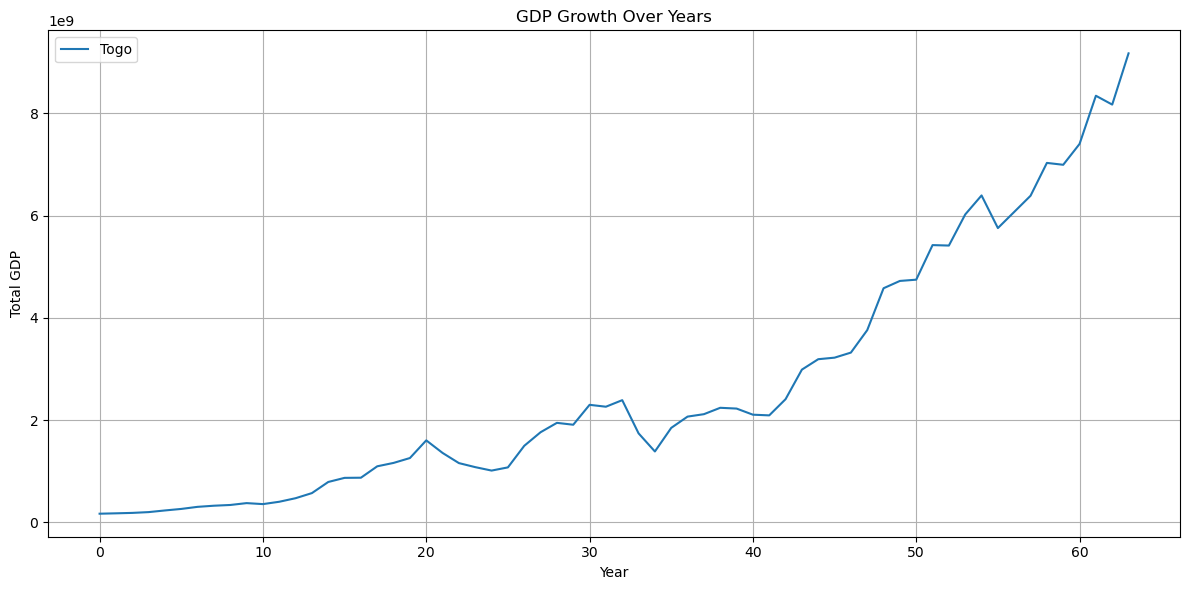

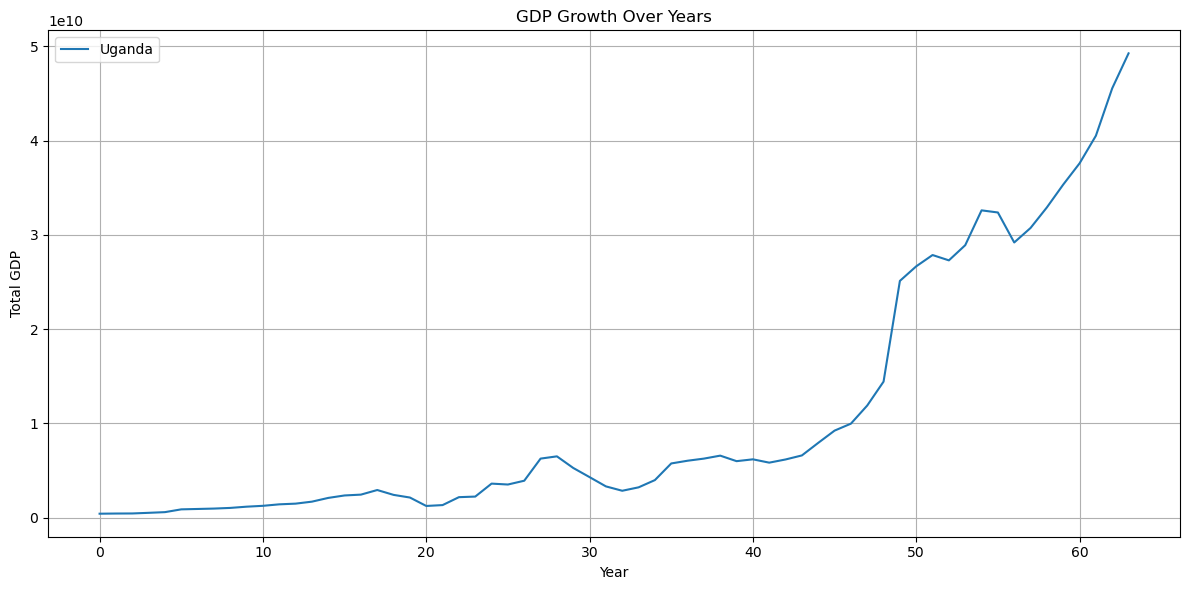

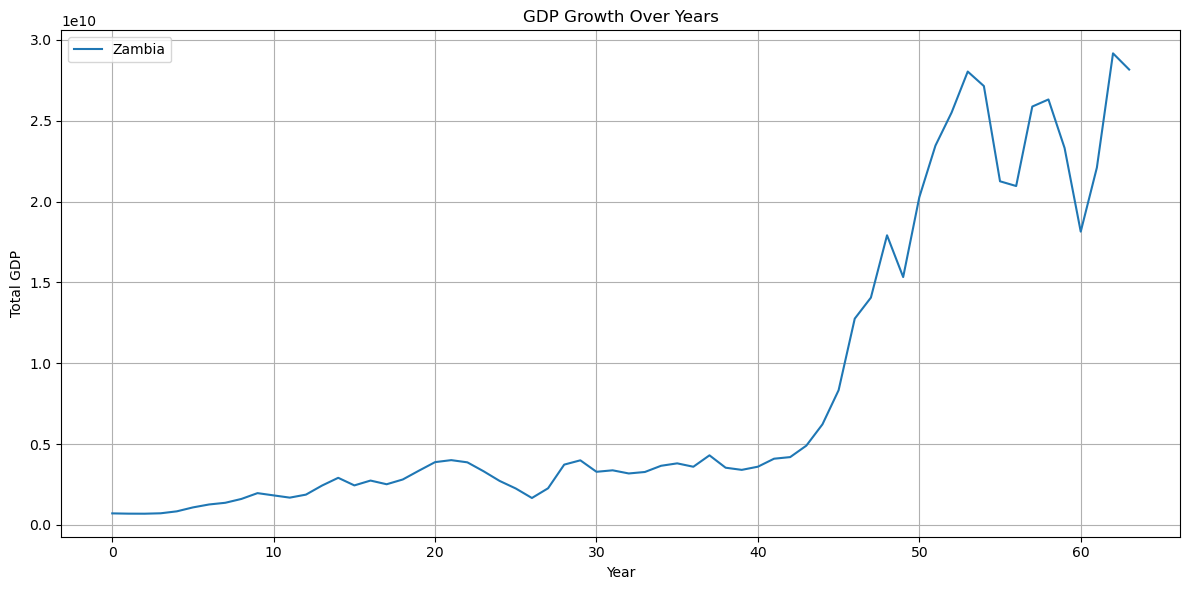

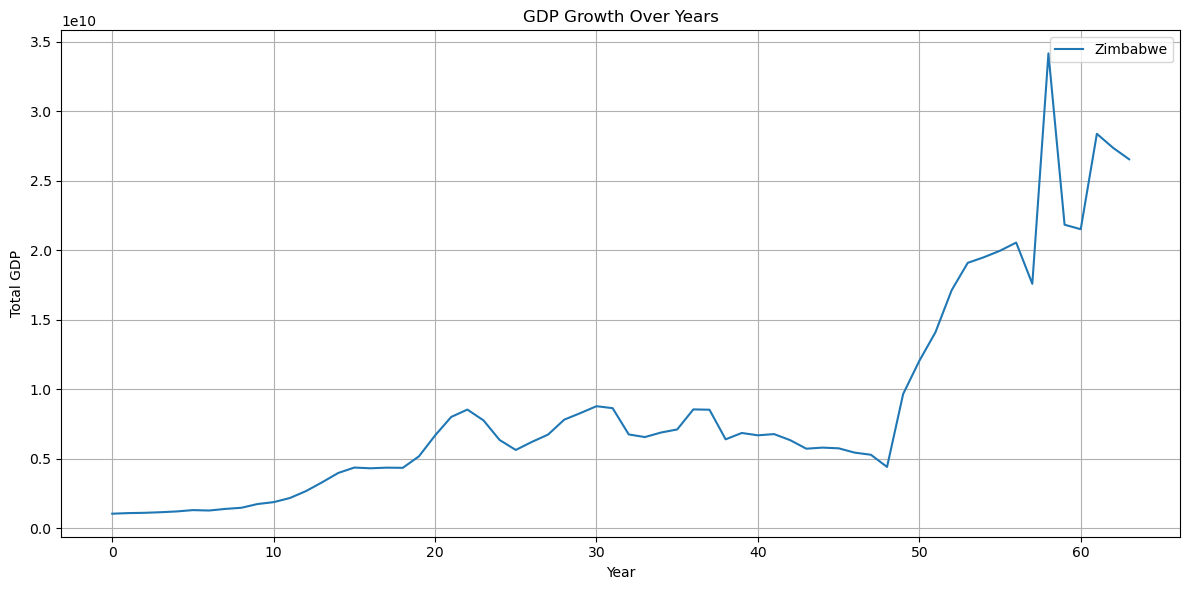

In [151]:
if 'Year' in df.columns:
    for country in df.columns[1:]:
        plt.figure(figsize=(12, 6))
        sns.lineplot(df[[country]])
        plt.title('GDP Growth Over Years')
        plt.xlabel('Year')
        plt.ylabel('Total GDP')
        plt.tight_layout()
        plt.grid()
        plt.show()

#### Correlation Matrix

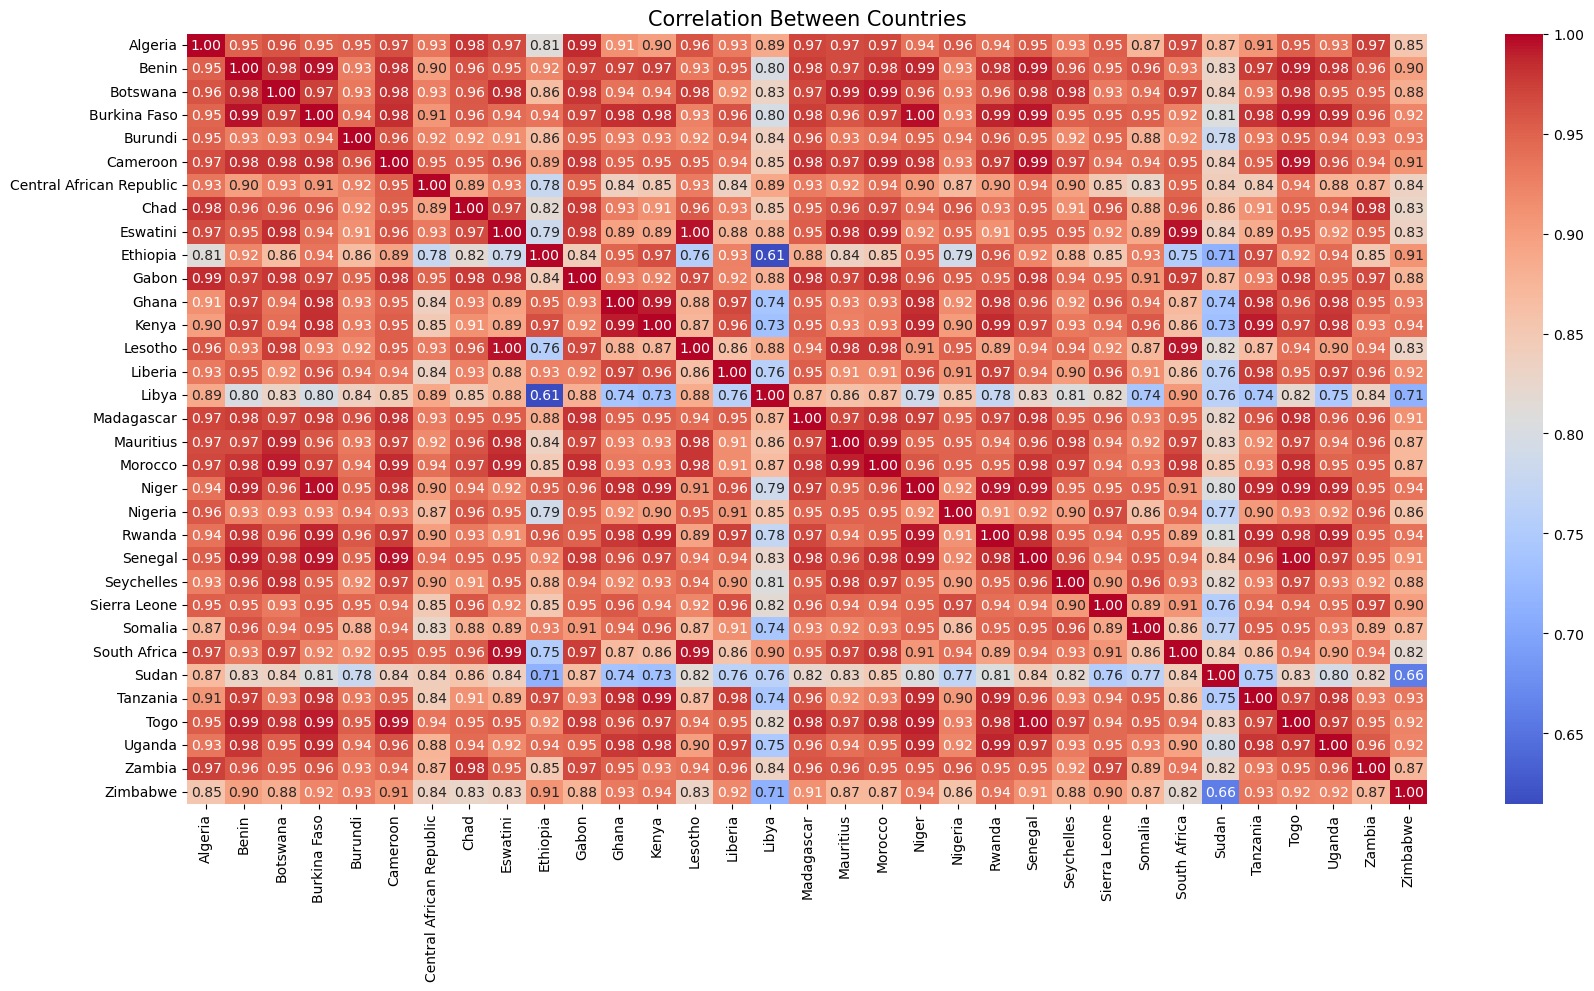

In [128]:
plt.figure(figsize=(20, 10))
correlation = df.iloc[:, 1:].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Countries', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()